# Proyecto Informe Final - Data Science Acamica

## Dataset: Flujo Vehicular por Unidades de Peaje AUSA

### Consigna

Te presentamos los pasos a seguir para realizar el proyecto 04.

1. Elige tu punto de partida entre dos opciones:

    1. Tus Proyectos 01 y 02
    2. Tu Proyecto 03

Si corresponde, emprolija lo hecho hasta el momento, incorporando las correcciones y/o sugerencias que hayas recibido de tu(s) evaluador/a (es/as).

2. Formula una nueva pregunta, problema o desafío para explorar. Aquí hay una lista no exhaustiva de opciones que puedes elegir:

    . Prueba un modelo de Machine Learning nuevo que no hayas visto en la carrera. En ese caso, debes explicar su funcionamiento y por qué consideras apropiado aplicarlo. La ganancia no necesariamente tiene que ser en desempeño, también puede ser en interpretabilidad o aplicabilidad.

    . Agrega al proyecto información de otra fuente. ¡Es sumamente válido! En ese caso, debe estar claramente explicado cómo conseguiste esos datos y qué usos esperas darles. Los datos deben ser accesibles por tu evaluador/a (por ejemplo, puedes subirlos al repositorio). Presta atención a la sensibilidad y privacidad de los datos antes de compartirlos.

    . Continúa el Análisis Exploratorio de Datos. Recuerda que es tan importante como entrenar un modelo de Machine Learning.

    . Sigue las sugerencias que te propusimos en los notebooks para continuar el Proyecto 03.

    . Plantea un objetivo alcanzable. En esta etapa de tu formación, es preferible un problema sencillo bien abordado que uno ambicioso que no sabes cómo abordar. El objetivo debe estar correctamente explicitado. Debes explicar qué quieres hacer y qué esperas encontrar. Imagina que es una tarea en tu trabajo y tienes que explicarle a un/a jefe/a qué vas a hacer y por qué.

### Checklist de evaluación

•Se evaluará la claridad con la que está expuesto el objetivo a alcanzar y su relevancia.

•Los pasos deben estar correctamente justificados. No deben haber grandes grupos de celdas de código sin explicar su función. Lo mismo aplica para los gráficos. Recuerda que el notebook es un informe.

•Las preguntas que se respondan deben estar correctamente explicitadas.

•Imagina que este proyecto lo usarías para presentar en una entrevista de trabajo, o que lo debes presentar en tu trabajo. Presta mucha atención a la redacción, presentación de gráficos, etc.

•Debes entregar el proyecto anterior correspondiente (Proyecto 2 si eliges continuar con el dataset de Properati, Proyecto 3 si eliges continuar con alguna aplicación), el cual debe estar subido al repositorio.

•Incorpora las correcciones y/o sugerencias que tu evaluador/a te haya dado en la devolución del proyecto correspondiente anterior.

Antes de subir tu proyecto a la plataforma Acámica para que sea evaluado, verifica que el Notebook se ejecute sin errores.

## Dataset: 
## -Flujo Vehicular por Unidades de Peaje AUSA. 
## -Registro de precipitaciones.
https://data.buenosaires.gob.ar/dataset/registro-precipitaciones-ciudad

## Proyecto elegido: Proyecto Nº3 Serie de Tiempo.

## Objetivo: 

Realizar un solo modelo predictivo que abarque la estación Illia y los distintos medios de pago contado o telepase, agregar días festivos e información de otra fuente (influencia de precipitaciones ) y probar un nuevo modelo de Machine Learning.

## 1. Preparación del Dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns

In [2]:
#Comenzamos importando dataset de tráfico.
data_2019 = pd.read_csv('/Users/feliorelo/Documents/ACAMICA 2020/Sprint 3/proyecto/flujo-vehicular-2019.csv', sep =',')
data_2018 = pd.read_csv('/Users/feliorelo/Documents/ACAMICA 2020/Sprint 3/proyecto/flujo-vehicular-2018.csv', sep =',')
data_2017 = pd.read_csv('/Users/feliorelo/Documents/ACAMICA 2020/Sprint 3/proyecto/flujo-vehicular-2017.csv', sep =',')
data_2016 = pd.read_csv('/Users/feliorelo/Documents/ACAMICA 2020/Sprint 3/proyecto/flujo-vehicular-2016.csv', sep =',')

In [3]:
#Unimos los 3 datasets, podemos hacerlo asi directamente ya que tienen las mismas columnas
dataset = pd.concat([data_2019, data_2018, data_2017, data_2016])

#Nos quedamos solamente con la estación Illia y la forma de pago Efectivo
mask = np.logical_and(dataset.estacion=='Illia', dataset.forma_pago == 'EFECTIVO')
mask1 = np.logical_and(dataset.estacion=='Illia', dataset.forma_pago == 'TELEPASE')
dataset1 = dataset[mask]
dataset2 = dataset[mask1]
dataset = pd.concat([dataset1, dataset2])
#Quitamos las columnas que no vamos a utilizar
dataset.drop(columns = ['periodo','hora_inicio'], inplace = True)

dataset.head()

fecha  hora_fin     dia estacion    sentido tipo_vehiculo  \
80   2019-01-01         2  Martes    Illia     Centro       Liviano   
86   2019-01-01         2  Martes    Illia     Centro        Pesado   
88   2019-01-01         2  Martes    Illia  Provincia       Liviano   
94   2019-01-01         2  Martes    Illia  Provincia        Pesado   
149  2019-01-01         3  Martes    Illia     Centro       Liviano   

    forma_pago  cantidad_pasos  
80    EFECTIVO             537  
86    EFECTIVO               1  
88    EFECTIVO             443  
94    EFECTIVO               1  
149   EFECTIVO             769

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 551178 entries, 80 to 1372328
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   fecha           551178 non-null  object
 1   hora_fin        551178 non-null  int64 
 2   dia             551178 non-null  object
 3   estacion        551178 non-null  object
 4   sentido         551178 non-null  object
 5   tipo_vehiculo   551178 non-null  object
 6   forma_pago      551178 non-null  object
 7   cantidad_pasos  551178 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 37.8+ MB


In [5]:
#Pasamos la columna fecha a formato datetime, y le unimos la hora_fin como hora
dataset['fecha2'] = pd.to_datetime(dataset.fecha) + pd.to_timedelta(dataset.hora_fin, unit = 'h')

#Quitamos las columnas fecha y hora_fin ya que las incluimos en el campo fecha2
dataset.drop(columns=['fecha','hora_fin'], inplace = True)

dataset.head()

dia estacion    sentido tipo_vehiculo forma_pago  cantidad_pasos  \
80   Martes    Illia     Centro       Liviano   EFECTIVO             537   
86   Martes    Illia     Centro        Pesado   EFECTIVO               1   
88   Martes    Illia  Provincia       Liviano   EFECTIVO             443   
94   Martes    Illia  Provincia        Pesado   EFECTIVO               1   
149  Martes    Illia     Centro       Liviano   EFECTIVO             769   

                 fecha2  
80  2019-01-01 02:00:00  
86  2019-01-01 02:00:00  
88  2019-01-01 02:00:00  
94  2019-01-01 02:00:00  
149 2019-01-01 03:00:00

In [6]:
#Corregimos el nombre de fecha2 a fecha
dataset.rename(columns = {'fecha2':'fecha'}, inplace = True) 
dataset.head()

dia estacion    sentido tipo_vehiculo forma_pago  cantidad_pasos  \
80   Martes    Illia     Centro       Liviano   EFECTIVO             537   
86   Martes    Illia     Centro        Pesado   EFECTIVO               1   
88   Martes    Illia  Provincia       Liviano   EFECTIVO             443   
94   Martes    Illia  Provincia        Pesado   EFECTIVO               1   
149  Martes    Illia     Centro       Liviano   EFECTIVO             769   

                  fecha  
80  2019-01-01 02:00:00  
86  2019-01-01 02:00:00  
88  2019-01-01 02:00:00  
94  2019-01-01 02:00:00  
149 2019-01-01 03:00:00

In [7]:
#Reordenamos el dataset por fecha
dataset.sort_values('fecha', inplace = True)
dataset.reset_index(drop=True, inplace = True)
dataset

dia estacion    sentido tipo_vehiculo forma_pago  cantidad_pasos  \
0       Viernes    Illia     Centro       Liviano   EFECTIVO              14   
1       Viernes    Illia  Provincia        Pesado   EFECTIVO               4   
2       Viernes    Illia  Provincia       Liviano   EFECTIVO             385   
3       Viernes    Illia  Provincia       Liviano   EFECTIVO               8   
4       Viernes    Illia     Centro       Liviano   EFECTIVO             649   
...         ...      ...        ...           ...        ...             ...   
551173   Martes    Illia     Centro       Liviano   TELEPASE             122   
551174   Martes    Illia  Provincia       Liviano   TELEPASE             110   
551175   Martes    Illia  Provincia        Pesado   TELEPASE               1   
551176   Martes    Illia  Provincia       Liviano   EFECTIVO             190   
551177   Martes    Illia     Centro       Liviano   EFECTIVO             214   

                     fecha  
0      2016-01-01 00:00:00  
1      2016-01-01 00:00:00  
2      2016-01-01 00:00:00  
3      2016-01-01 00:00:00  
4      2016-01-01 00:00:00  
...                    ...  
551173 2019-12-31 23:00:00  
551174 2019-12-31 23:00:00  
551175 2019-12-31 23:00:00  
551176 2019-12-31 23:00:00  
551177 2019-12-31 23:00:00  

[551178 rows x 7 columns]

In [8]:
print(dataset['forma_pago'].unique())

['EFECTIVO' 'TELEPASE']


In [9]:
#Graficamos agrupando nuestros días para obtener una primera visualización
diario = dataset.resample('D', on = 'fecha').sum()
print(diario.shape)
diario.head()

(1461, 1)


cantidad_pasos
fecha                     
2016-01-01           25602
2016-01-02           36136
2016-01-03           37225
2016-01-04           50312
2016-01-05           49907

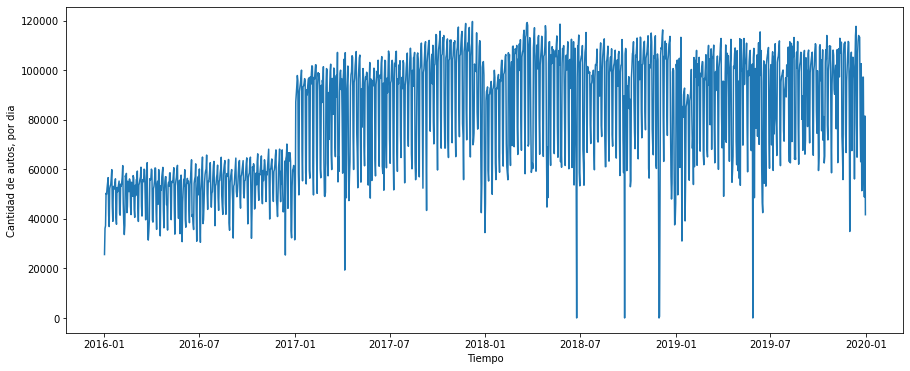

In [10]:
plt.figure(figsize = (15,6))
plt.plot(diario.index, diario.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por dia')
plt.show()

# Parte A: Analisis Exploratorio

A partir de este momento comenzaremos con el analisis exploratorio de los datos. 

### Existen Valores nulos o cercanos a 0?

Como podemos observar existen datos que tienen valores nulos, esto se puede dar por varios motivos, por ejemplo, fallas en sistemas, cortes, piquetas,etc. Lo bueno que estos dias no son más de 6 valores.

In [11]:
#Para encontrarlos tendremos en cuenta menores a 20000 pasos , ya que 
# en la gráfica podemos observar por debajo de 20000 como nulos o atípicos.
outliers = diario[diario.cantidad_pasos<20000] 
outliers

cantidad_pasos
fecha                     
2017-04-06           19336
2018-06-25               0
2018-09-25               0
2018-11-30               0
2018-12-01             640
2019-05-29               0

-2017-04-06: Paro General.

-2018-06-25: Paro General.

-2018-09-25: Paro General.

-2018-11-30: Cumbre G20.

-2018-12-01: Cumbre G20.

-2019-05-29: Paro General.

## Cantidad de pasos por forma de pago en porcentaje

In [12]:
dataset_a = pd.concat([data_2019, data_2018, data_2017, data_2016])
dataset_analisis=dataset_a.groupby([dataset_a.forma_pago])['cantidad_pasos'].sum().to_frame().reset_index().sort_values(by='cantidad_pasos', ascending=False)
dataset_analisis.cantidad_pasos=round(100*(dataset_analisis.cantidad_pasos/dataset_analisis.cantidad_pasos.sum()),1)
dataset_analisis.head(2)

forma_pago  cantidad_pasos
1   EFECTIVO            51.8
9   TELEPASE            32.8

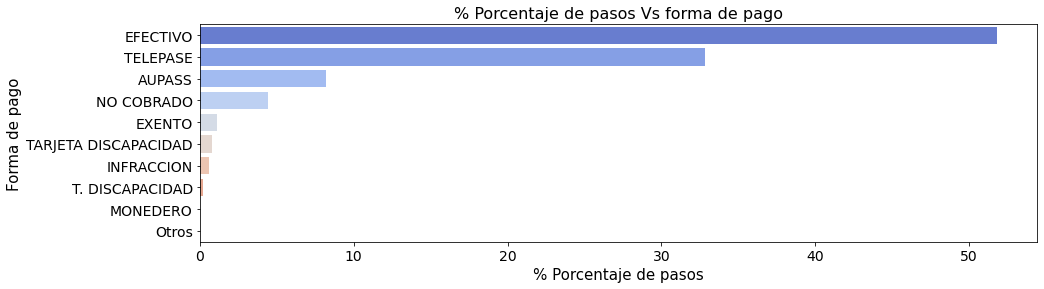

In [13]:
plt.figure(figsize=(15, 4))
sns.barplot(y="forma_pago", 
            x="cantidad_pasos", 
            data=dataset_analisis,
            palette= "coolwarm"
            )

#Formato de la gráfica
plt.title('% Porcentaje de pasos Vs forma de pago',fontsize=16)
plt.xlabel('% Porcentaje de pasos', fontsize=15)
plt.ylabel('Forma de pago', fontsize=15)
#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tick_params(labelsize=14)
plt.show()

Nuestra muestra (efectivo y telepase) representa el 84,6% del total de pasos, el 15,4% restante corresponde a otra forma de pago

## Cantidad de pasos teniendo en cuenta el sentido en porcentaje

In [14]:
dataset_b = pd.concat([data_2019, data_2018, data_2017, data_2016])
dataset_bnalisis=dataset_b.groupby([dataset_b.sentido])['cantidad_pasos'].sum().to_frame().reset_index().sort_values(by='cantidad_pasos', ascending=False)
dataset_bnalisis.cantidad_pasos=round(100*(dataset_bnalisis.cantidad_pasos/dataset_bnalisis.cantidad_pasos.sum()),1)
dataset_bnalisis.head(5)

sentido  cantidad_pasos
1  Provincia            51.0
0     Centro            49.0

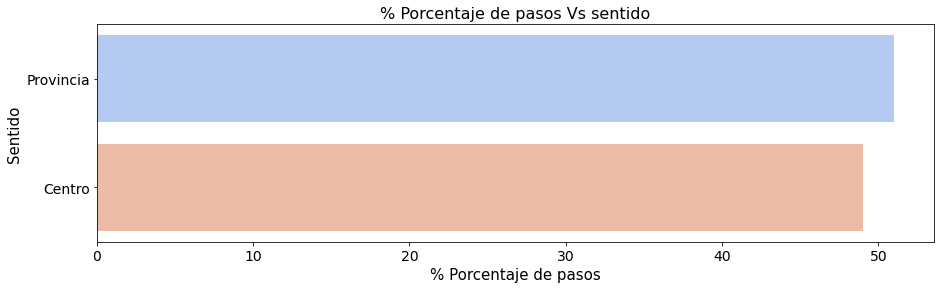

In [15]:
plt.figure(figsize=(15, 4))
sns.barplot(y="sentido", 
            x="cantidad_pasos", 
            data=dataset_bnalisis,
            palette= "coolwarm"
            )

#Formato de la gráfica
plt.title('% Porcentaje de pasos Vs sentido',fontsize=16)
plt.xlabel('% Porcentaje de pasos', fontsize=15)
plt.ylabel('Sentido', fontsize=15)
#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tick_params(labelsize=14)
plt.show()

Nuestra muestra se encuentra balanceada, casi un 50% en ambas direcciones.

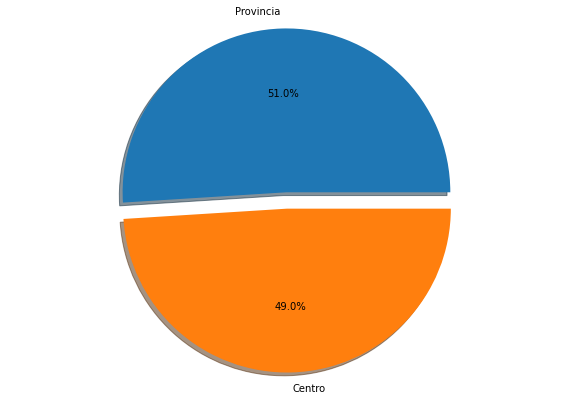

In [16]:
plt.figure(figsize =(10, 7))
plt.pie(x=dataset_bnalisis.cantidad_pasos, labels = dataset_bnalisis.sentido, autopct='%1.1f%%'
       ,shadow=True, explode = (0, 0.1))
plt.axis('equal') 
# show plot
plt.show()

Gráfico de torta que muestra el porcentaje de vehiculos en los distintos sentidos.

## Distribución tipo de vehiculos

In [17]:
dataset_t = pd.concat([data_2019, data_2018, data_2017, data_2016])
dataset_tnalisis=dataset_t.groupby([dataset_t.tipo_vehiculo])['cantidad_pasos'].sum().to_frame().reset_index().sort_values(by='cantidad_pasos', ascending=False)
dataset_tnalisis.cantidad_pasos=round(100*(dataset_tnalisis.cantidad_pasos/dataset_tnalisis.cantidad_pasos.sum()),1)
dataset_tnalisis.head(5)

tipo_vehiculo  cantidad_pasos
0       Liviano            90.5
1        Pesado             9.5

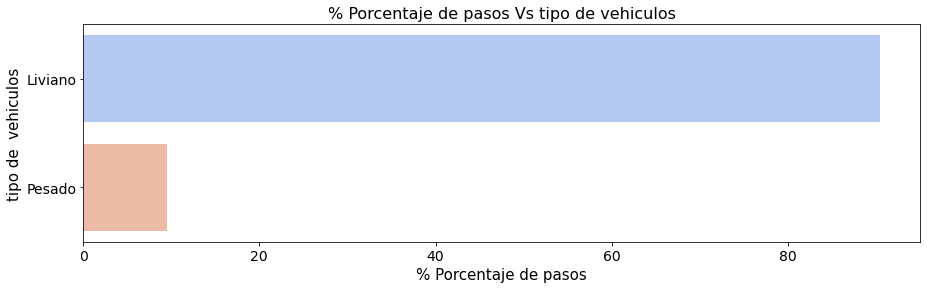

In [18]:
plt.figure(figsize=(15, 4))
sns.barplot(y="tipo_vehiculo", 
            x="cantidad_pasos", 
            data=dataset_tnalisis,
            palette= "coolwarm"
            )

#Formato de la gráfica
plt.title('% Porcentaje de pasos Vs tipo de vehiculos',fontsize=16)
plt.xlabel('% Porcentaje de pasos', fontsize=15)
plt.ylabel('tipo de  vehiculos', fontsize=15)
#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tick_params(labelsize=14)
plt.show()

Como podemos observar existe un mayor porcentaje de vehiculos livianos en nuestra muestra. Aproximadamente el 90,5% corresponde a livianos y el 90,5% a pesados.

## Luego de analizar el dataset en general, estudiaremos el mismo pero observandolo por partes, primero los distintos sentidos luego las distintas forma de pago.

#### Comenzamos con una analisis comparativo del tipo de vehiculo teniendo en cuenta los distintos sentidos

In [19]:
centro = dataset[dataset.sentido=="Centro"]
centro.head(3)

dia estacion sentido tipo_vehiculo forma_pago  cantidad_pasos  \
0  Viernes    Illia  Centro       Liviano   EFECTIVO              14   
4  Viernes    Illia  Centro       Liviano   EFECTIVO             649   
7  Viernes    Illia  Centro        Pesado   EFECTIVO               2   

       fecha  
0 2016-01-01  
4 2016-01-01  
7 2016-01-01

In [20]:
provincia = dataset[dataset.sentido=="Provincia"]
provincia.head(3)

dia estacion    sentido tipo_vehiculo forma_pago  cantidad_pasos  \
1  Viernes    Illia  Provincia        Pesado   EFECTIVO               4   
2  Viernes    Illia  Provincia       Liviano   EFECTIVO             385   
3  Viernes    Illia  Provincia       Liviano   EFECTIVO               8   

       fecha  
1 2016-01-01  
2 2016-01-01  
3 2016-01-01

In [21]:
#Distribución de tipo de vehiculos sentido centro.
centro_s=centro.groupby([centro.tipo_vehiculo])['cantidad_pasos'].sum().to_frame().reset_index().sort_values(by='cantidad_pasos', ascending=False)
centro_s.cantidad_pasos=round(100*(centro_s.cantidad_pasos/centro_s.cantidad_pasos.sum()),1)
centro_s.head(3)

tipo_vehiculo  cantidad_pasos
0       Liviano            95.4
1        Pesado             4.6

El 95,4% de los vehiculos son del tipo liviano en sentido centro, solo el 4,6% son pesados.

In [22]:
#Distribución de tipo de vehiculos sentido provincia.
provincia_s=provincia.groupby([provincia.tipo_vehiculo])['cantidad_pasos'].sum().to_frame().reset_index().sort_values(by='cantidad_pasos', ascending=False)
provincia_s.cantidad_pasos=round(100*(provincia_s.cantidad_pasos/provincia_s.cantidad_pasos.sum()),1)
provincia_s.head(3)

tipo_vehiculo  cantidad_pasos
0       Liviano            96.7
1        Pesado             3.3

El 96,7% de los vehiculos son del tipo liviano en sentido centro, solo el 3,3% son pesados. Se puede observar una menor proporción de vehiculos pesados en dirección provincia.

In [23]:
#Distribución de forma de pago sentido centro.
centro_p=centro.groupby([centro.forma_pago])['cantidad_pasos'].sum().to_frame().reset_index().sort_values(by='cantidad_pasos', ascending=False)
centro_p.cantidad_pasos=round(100*(centro_p.cantidad_pasos/centro_p.cantidad_pasos.sum()),1)
centro_p.head(3)

forma_pago  cantidad_pasos
0   EFECTIVO            57.0
1   TELEPASE            43.0

In [24]:
#Distribución de forma de pago sentido provincia.
provincia_p=provincia.groupby([provincia.forma_pago])['cantidad_pasos'].sum().to_frame().reset_index().sort_values(by='cantidad_pasos', ascending=False)
provincia_p.cantidad_pasos=round(100*(provincia_p.cantidad_pasos/provincia_p.cantidad_pasos.sum()),1)
provincia_p.head(3)

forma_pago  cantidad_pasos
0   EFECTIVO            57.0
1   TELEPASE            43.0

En cuanto a la forma de pago vemos que en ambos sentidos el 57% opta por efectivo y el 43% por telepase.

#### Ahora veremos el comporatmiento de los distintos tipos de vehiculos.

In [25]:
#Principal forma de pago de vehiculos pesados.
pesado = dataset[dataset.tipo_vehiculo=="Pesado"]

In [26]:
pesado_f = pesado.groupby([pesado.forma_pago])['cantidad_pasos'].sum().to_frame().reset_index().sort_values(by='cantidad_pasos', ascending=False)
pesado_f.cantidad_pasos=round(100*(pesado_f.cantidad_pasos/pesado_f.cantidad_pasos.sum()),1)
pesado_f.head(3)

forma_pago  cantidad_pasos
0   EFECTIVO            52.2
1   TELEPASE            47.8

El 52,5% de los vehiculos pesados prefiere abonar en efectivo mientras que el 47,8% utiliza el telepase

In [27]:
#Principal forma de pago de vehiculos Livianos.
liviano = dataset[dataset.tipo_vehiculo=="Liviano"]

In [28]:
liviano_f = liviano.groupby([liviano.forma_pago])['cantidad_pasos'].sum().to_frame().reset_index().sort_values(by='cantidad_pasos', ascending=False)
liviano_f.cantidad_pasos=round(100*(liviano_f.cantidad_pasos/liviano_f.cantidad_pasos.sum()),1)
liviano_f.head(3)

forma_pago  cantidad_pasos
0   EFECTIVO            57.2
1   TELEPASE            42.8

El 52,5% de los vehiculos livianos prefiere abonar en efectivo mientras que el 47,8% utiliza el telepase

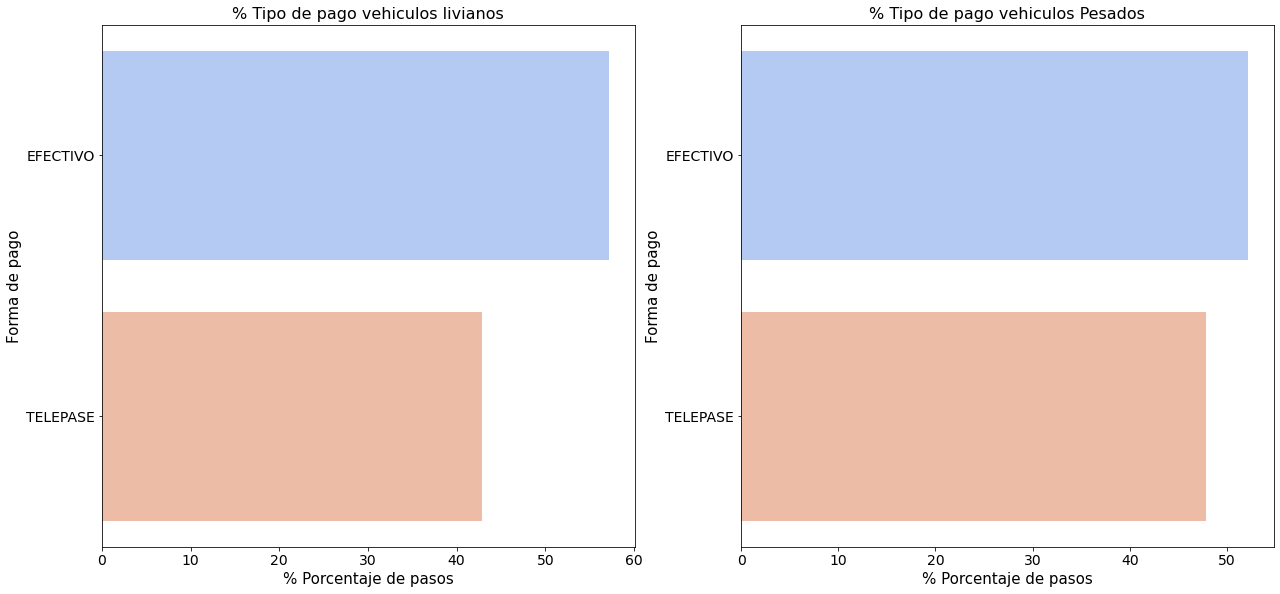

In [29]:
plt.figure(figsize = (7*3,4.8*2))

plt.subplot(1,2,1)
sns.barplot(y="forma_pago", 
            x="cantidad_pasos", 
            data=liviano_f,
            palette= "coolwarm"
            ,label = "liviano")
#Formato de la gráfica
plt.title('% Tipo de pago vehiculos livianos',fontsize=16)
plt.xlabel('% Porcentaje de pasos', fontsize=15)
plt.ylabel('Forma de pago', fontsize=15)
plt.tick_params(labelsize=14)

plt.subplot(1,2,2)
sns.barplot(y="forma_pago", 
            x="cantidad_pasos", 
            data=pesado_f,
            palette= "coolwarm", label = 'pesado'
            )
#Formato de la gráfica
plt.title('% Tipo de pago vehiculos Pesados',fontsize=16)
plt.xlabel('% Porcentaje de pasos', fontsize=15)
plt.ylabel('Forma de pago', fontsize=15)
plt.tick_params(labelsize=14)
plt.show()

In [30]:
dataset['año'] = dataset['fecha'].dt.year

In [31]:
gb = dataset.groupby([(dataset.año),(dataset.forma_pago)], as_index=False).sum()

posx and posy should be finite values
posx and posy should be finite values


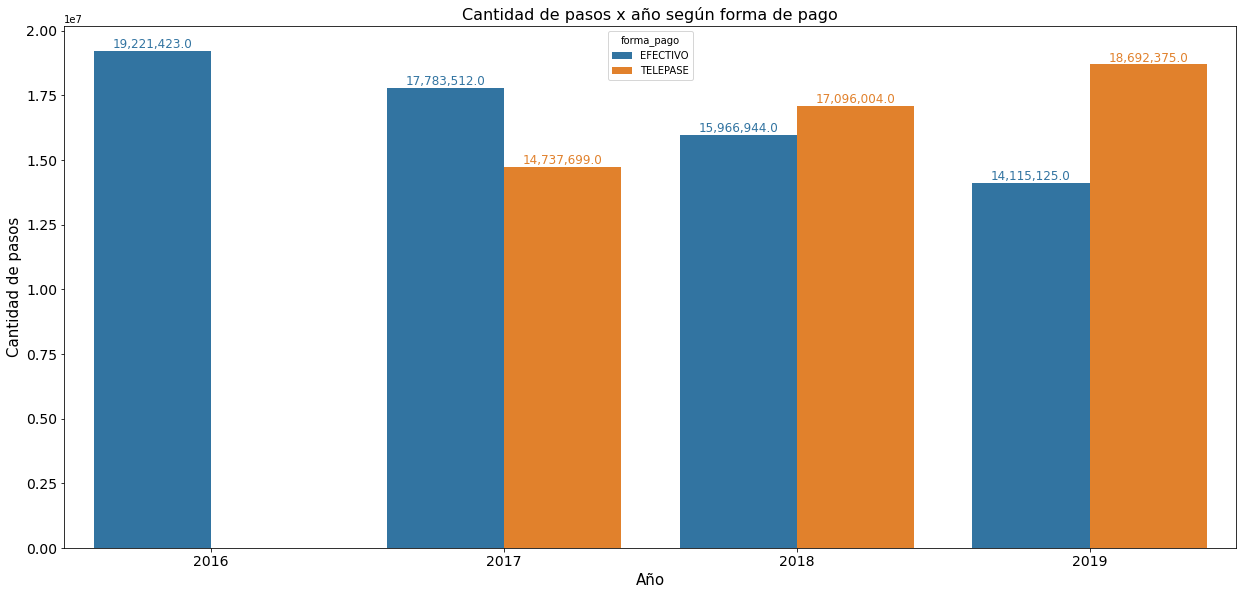

In [32]:
plt.figure(figsize = (7*3,4.8*2))

ax = sns.barplot(x="año", y="cantidad_pasos", hue="forma_pago", data=gb)
#Formato de la gráfica
plt.title('Cantidad de pasos x año según forma de pago',fontsize=16)
plt.xlabel('Año', fontsize=15)
plt.ylabel('Cantidad de pasos', fontsize=15)
plt.tick_params(labelsize=14)

# Agregamos a cada barra su valor en la parte superior.
for bar in ax.patches:
  # The text annotation for each bar should be its height.
  bar_value = bar.get_height()
  # Format the text with commas to separate thousands. You can do
  # any type of formatting here though.
  text = f'{bar_value:,}'
  # This will give the middle of each bar on the x-axis.
  text_x = bar.get_x() + bar.get_width() / 2
  # get_y() is where the bar starts so we add the height to it.
  text_y = bar.get_y() + bar_value
  # If we want the text to be the same color as the bar, we can
  # get the color like so:
  bar_color = bar.get_facecolor()
  # If you want a consistent color, you can just set it as a constant, e.g. #22222
  ax.text(text_x, text_y, text, ha='center', va='bottom', color=bar_color,
          size=12)
plt.show()

Podemos ver que el Telepase comenzo a utilizarce en el año 2017, y a medida que pasan los años observamos un incremento de su uso mientras que disminuye el pago en efectivo.

In [33]:
#gx = dataset.groupby([(dataset.año),(dataset.tipo_vehiculo),(dataset.sentido)], as_index=False).sum()
gx = dataset.groupby([(dataset.año),(dataset.tipo_vehiculo)], as_index=False).sum()

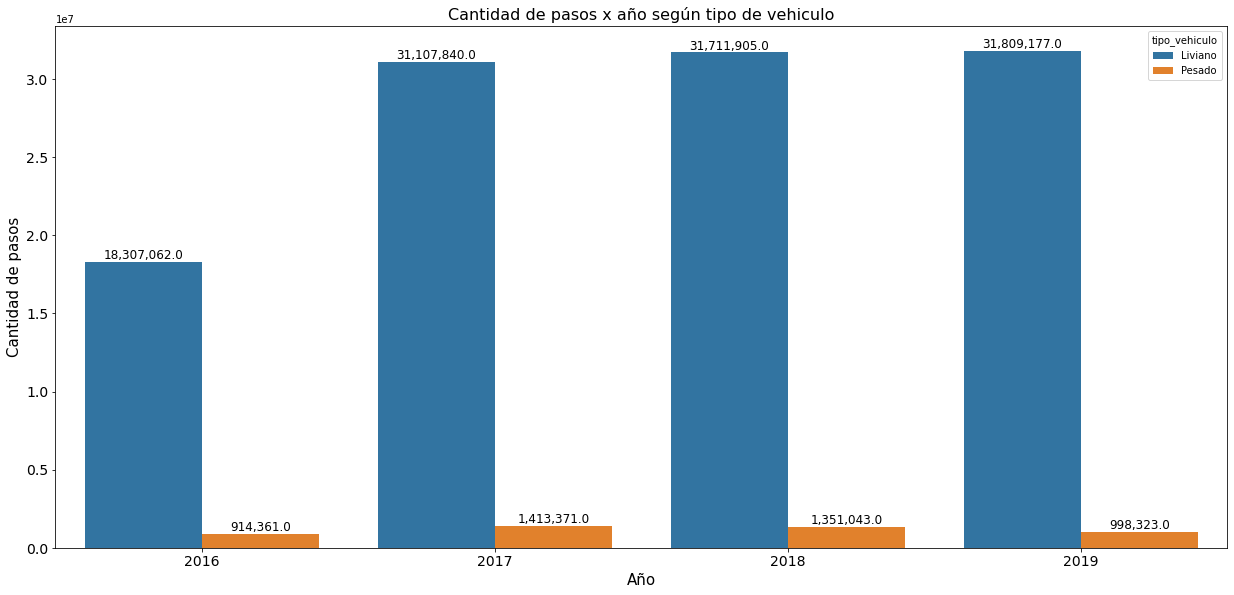

In [34]:
plt.figure(figsize = (7*3,4.8*2))
ax = sns.barplot(x="año", y="cantidad_pasos", hue="tipo_vehiculo", data=gx)
#Formato de la gráfica
plt.title('Cantidad de pasos x año según tipo de vehiculo',fontsize=16)
plt.xlabel('Año', fontsize=15)
plt.ylabel('Cantidad de pasos', fontsize=15)
plt.tick_params(labelsize=14)

# Agregamos a cada barra su valor en la parte superior.
for bar in ax.patches:
  # The text annotation for each bar should be its height.
  bar_value = bar.get_height()
  # Format the text with commas to separate thousands. You can do
  # any type of formatting here though.
  text = f'{bar_value:,}'
  # This will give the middle of each bar on the x-axis.
  text_x = bar.get_x() + bar.get_width() / 2
  # get_y() is where the bar starts so we add the height to it.
  text_y = bar.get_y() + bar_value
  # If we want the text to be the same color as the bar, we can
  # get the color like so:
  bar_color = bar.get_facecolor()
  # If you want a consistent color, you can just set it as a constant, e.g. #22222
  ax.text(text_x, text_y, text, ha='center', va='bottom', color='black',
          size=12)
plt.show()




En esta gráfica podemos observar la cantidad de pasos según el tipo de vehiculo y su variacíon anual, vemos que mas del 95% de todos los años corresponden a vehiculos del tipo liviano.

In [35]:
gp = gx[gx.tipo_vehiculo=="Pesado"]

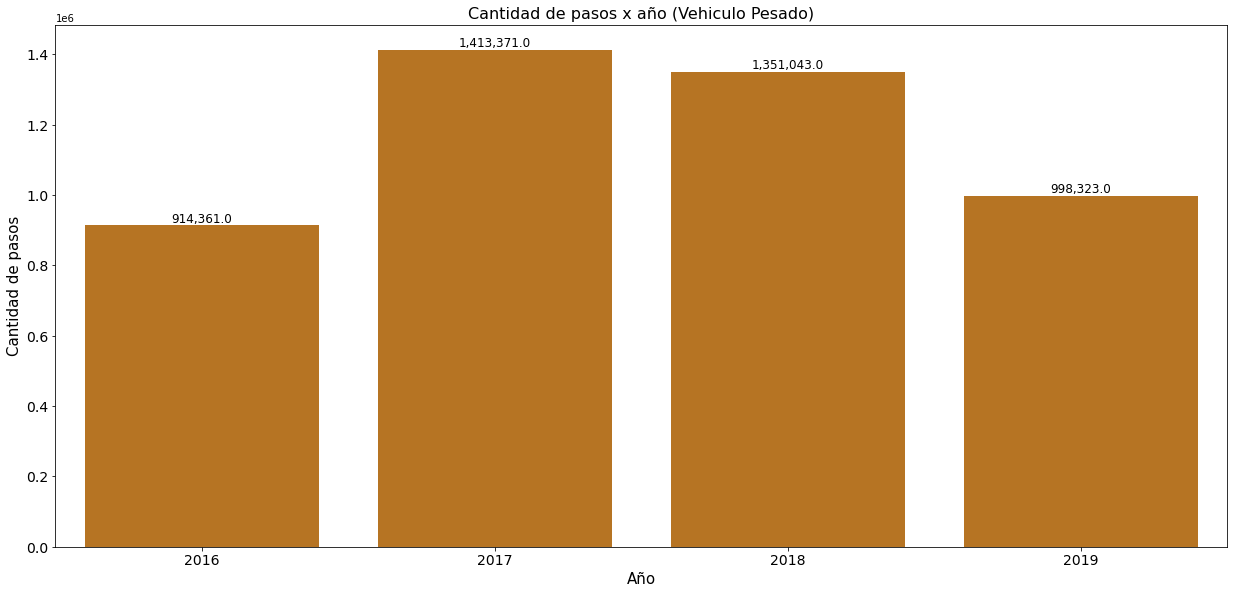

In [36]:
plt.figure(figsize = (7*3,4.8*2))
ax = sns.barplot(x="año", y="cantidad_pasos", data=gp, color='#cf760a')
#Formato de la gráfica
plt.title('Cantidad de pasos x año (Vehiculo Pesado)',fontsize=16)
plt.xlabel('Año', fontsize=15)
plt.ylabel('Cantidad de pasos', fontsize=15)
plt.tick_params(labelsize=14)

# Agregamos a cada barra su valor en la parte superior.
for bar in ax.patches:
  # The text annotation for each bar should be its height.
  bar_value = bar.get_height()
  # Format the text with commas to separate thousands. You can do
  # any type of formatting here though.
  text = f'{bar_value:,}'
  # This will give the middle of each bar on the x-axis.
  text_x = bar.get_x() + bar.get_width() / 2
  # get_y() is where the bar starts so we add the height to it.
  text_y = bar.get_y() + bar_value
  # If we want the text to be the same color as the bar, we can
  # get the color like so:
  bar_color = bar.get_facecolor()
  # If you want a consistent color, you can just set it as a constant, e.g. #22222
  ax.text(text_x, text_y, text, ha='center', va='bottom', color='black',
          size=12)
plt.show()

Remarcamos nuevamente la gráfica de vehiculos pesados, para observar la disminución de pasos con el paso de los años, pasando de 1351043 a 998323 en el año 2019.

## A continuación trazaremos gráficos univariados

Exploraremos cada variable de manera individual en el set de datos. Con la finalidad de ver la distribución para esto gráficaremos histogramas y/o boxplots.

In [37]:
#Dividmos nuestro dataset en tipos de vehiculos, ya que existe una gran diferencia en cuanto a la cantidad de pasos
#de cada uno.
liviano = dataset[dataset['tipo_vehiculo']=="Liviano"]
pesado = dataset[dataset['tipo_vehiculo']=="Pesado"]

In [38]:
#Resampleamos 
liviano = liviano.resample('D', on = 'fecha').sum()
liviano.head(2)

cantidad_pasos     año
fecha                             
2016-01-01           25165  197568
2016-01-02           35009  203616

In [39]:
pesado = pesado.resample('D', on = 'fecha').sum()
pesado.head(2)

cantidad_pasos     año
fecha                             
2016-01-01             437  211680
2016-01-02            1127  306432

/Users/feliorelo/opt/anaconda3/envs/acamicaserie/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/feliorelo/opt/anaconda3/envs/acamicaserie/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cantidad_pasos'>

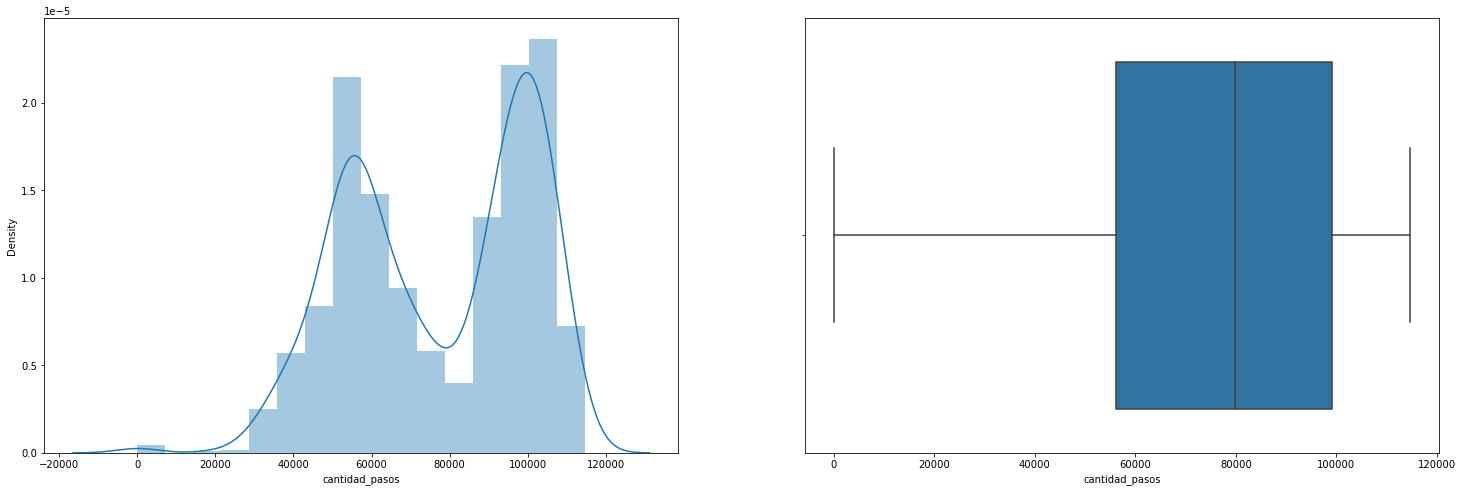

In [40]:
plt.figure(figsize = (25,8))

plt.subplot(1,2,1)
sns.distplot(liviano.cantidad_pasos)
plt.subplot(1,2,2)
sns.boxplot(liviano.cantidad_pasos)

Podemos observar un histogtama del tipo bimodal, esto quire decir que los datos que estamos utilizando  pueden venir de dos procesos diferentes. Por ejemplo, es posible que se esten mezclando los datos de circulación de semana con los de fines de semana, o tal vez exista otro efecto que nos este produciendo esto.  Esto hace que la media y la mediana no sean de utilidad, puesto que sus valores estarán en algún lugar entre los dos puntos máximos y distorsionarán enormemente la descripción de la distribución.

/Users/feliorelo/opt/anaconda3/envs/acamicaserie/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/feliorelo/opt/anaconda3/envs/acamicaserie/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cantidad_pasos'>

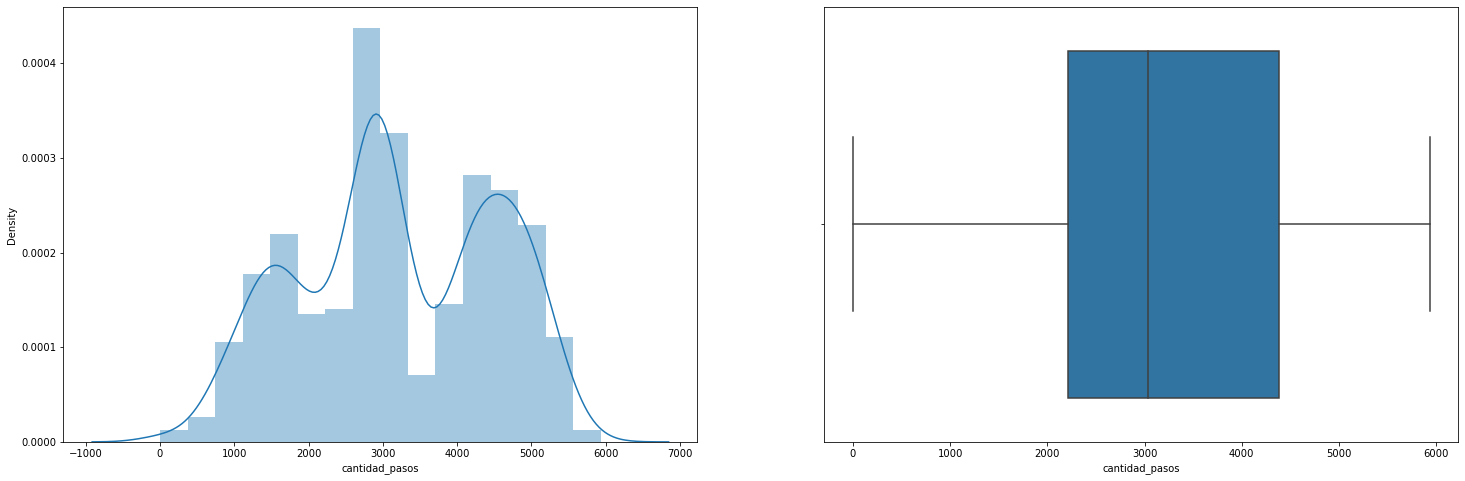

In [41]:
plt.figure(figsize = (25,8))

plt.subplot(1,2,1)
sns.distplot(pesado.cantidad_pasos)
plt.subplot(1,2,2)
sns.boxplot(pesado.cantidad_pasos)

En este caso, resulta un comportamiento similar al anterior, se puede observar que existen 3 valores moda, pero se nota un mayor valor de cantidad en la moda de 3000 pasos.

## Variación semanal de cantidad de pasos en función del tipo de vehiculo.

## Comenzamos con los totales de la cantidad de pasos.

In [42]:
liviano1 = dataset[dataset['tipo_vehiculo']=="Liviano"]
pesado1 = dataset[dataset['tipo_vehiculo']=="Pesado"]

In [43]:
liviano1['día']= liviano1['fecha'].dt.day
liviano1['año']= liviano1['fecha'].dt.year
pesado1['día']= pesado1['fecha'].dt.day
pesado1['año']= pesado1['fecha'].dt.year

<ipython-input-43-4808905c8492>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  liviano1['día']= liviano1['fecha'].dt.day
<ipython-input-43-4808905c8492>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  liviano1['año']= liviano1['fecha'].dt.year
<ipython-input-43-4808905c8492>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stabl

In [44]:
liviano_dia = liviano1.pivot_table(values = 'cantidad_pasos',
                                index = ['dia','año'], 
                                aggfunc = 'sum')
liviano_dia = liviano_dia.reset_index()
liviano_dia.head()

dia   año  cantidad_pasos
0  Domingo  2016         2013987
1  Domingo  2017         3063378
2  Domingo  2018         3150639
3  Domingo  2019         3716761
4   Jueves  2016         2910908

In [45]:
pesado_dia = pesado1.pivot_table(values = 'cantidad_pasos',
                                index = ['dia','año'], 
                                aggfunc = 'sum')
pesado_dia = pesado_dia.reset_index()
pesado_dia.head()

dia   año  cantidad_pasos
0  Domingo  2016           67684
1  Domingo  2017           87609
2  Domingo  2018           86747
3  Domingo  2019           84343
4   Jueves  2016          155225

In [46]:
order_days = ["Lunes","Martes","Miércoles","Jueves","Viernes","Sábado","Domingo"]

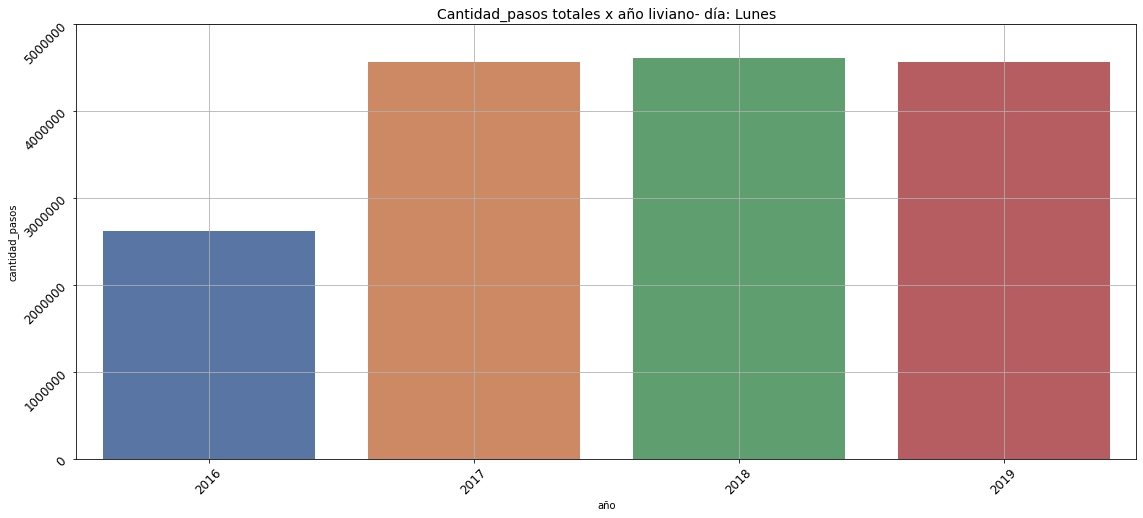

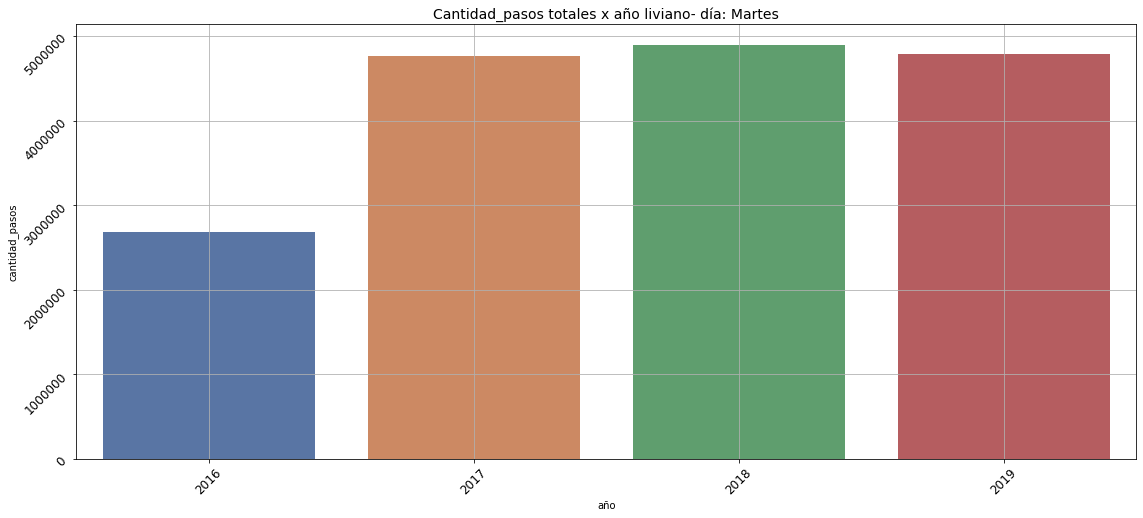

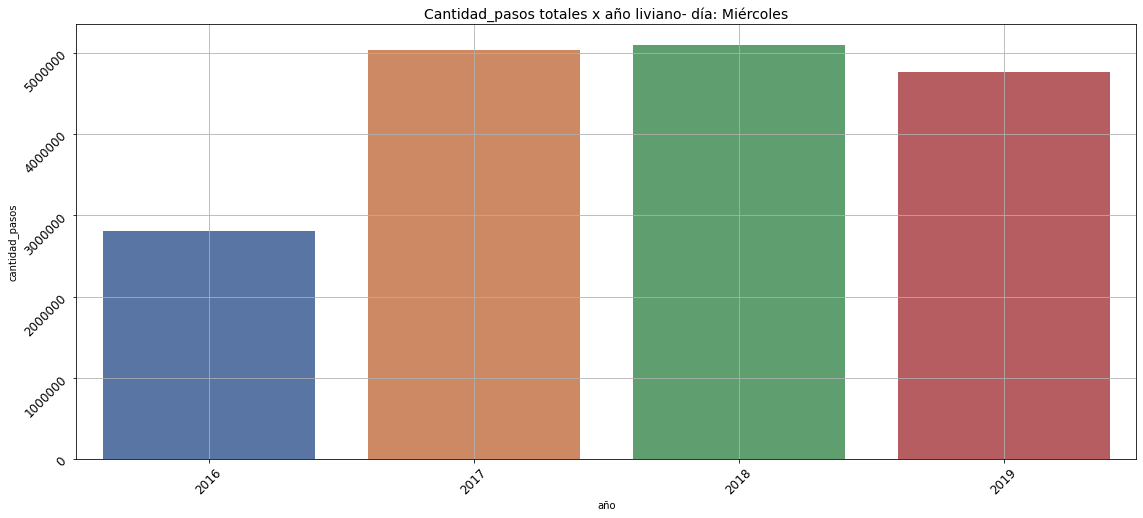

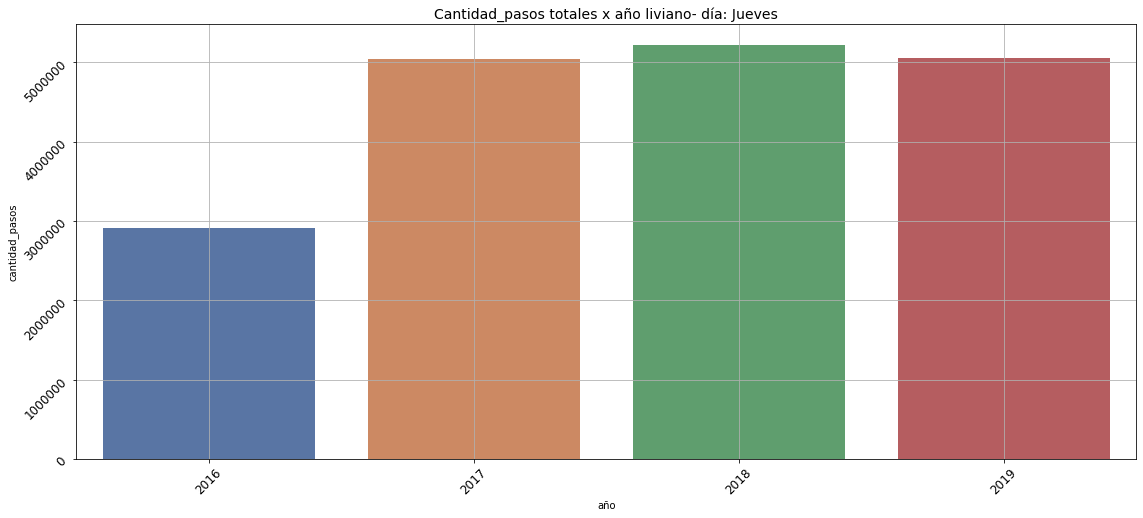

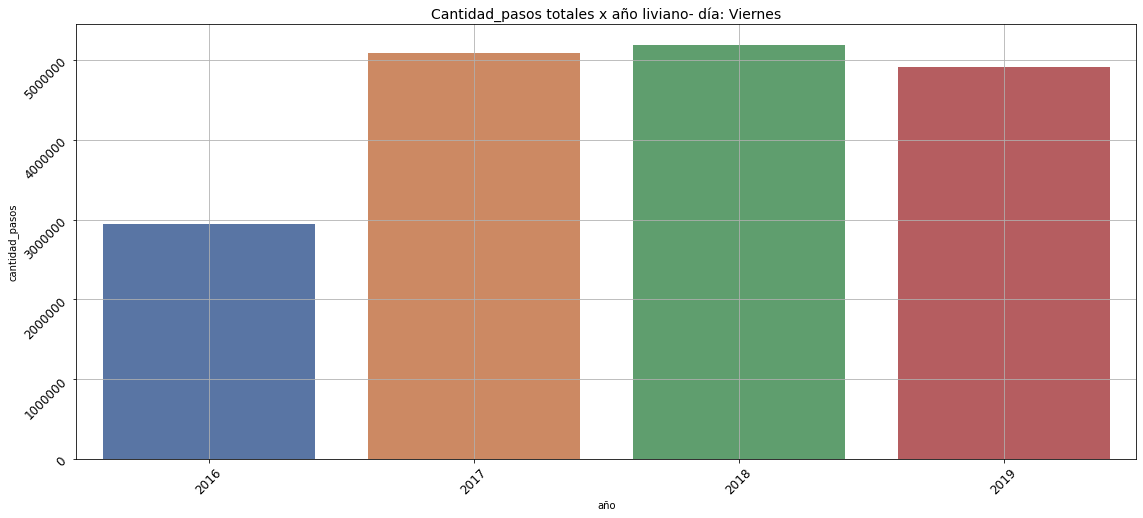

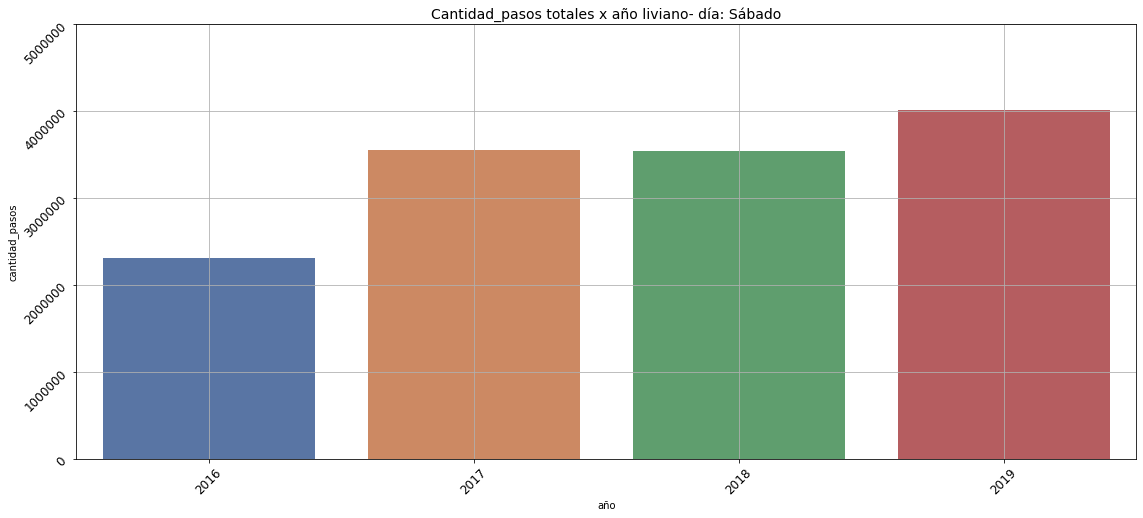

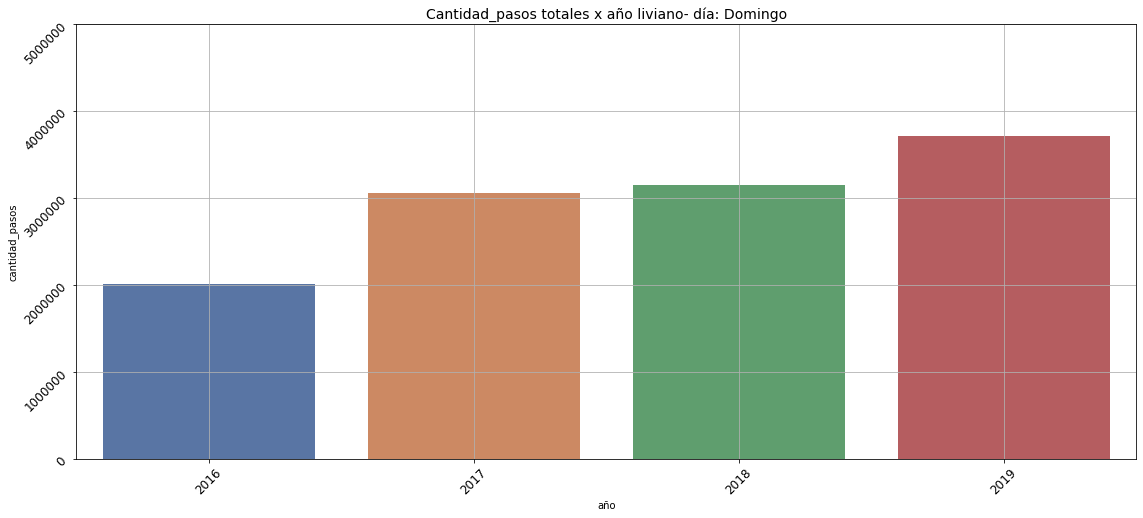

In [47]:
for dia in order_days:
    plt.figure(figsize = (19,8))
    sns.barplot(data = liviano_dia[liviano_dia['dia']== dia], x='año', y ='cantidad_pasos', palette="deep")
    plt.title('Cantidad_pasos totales x año liviano- día: '+dia, fontsize = 14)
    #plt.ylabel('Cantidad de pasos x Millón', fontsize = 14)
    plt.xticks(rotation = 45,fontsize = 12)
    plt.yticks(range(0, 5222254,1000000),
               [str(i) for i in range(0, 5222254,1000000)],
               rotation = 45,
               fontsize = 12)
    plt.grid()

Podemos observar que los días de semanas(lunes a viernes) son los días que más autos transitan a lo largo de todos los años bajo estudios, notando un incremento en el año 2019 en la cantidad de personas que circulan el fin de semana. 

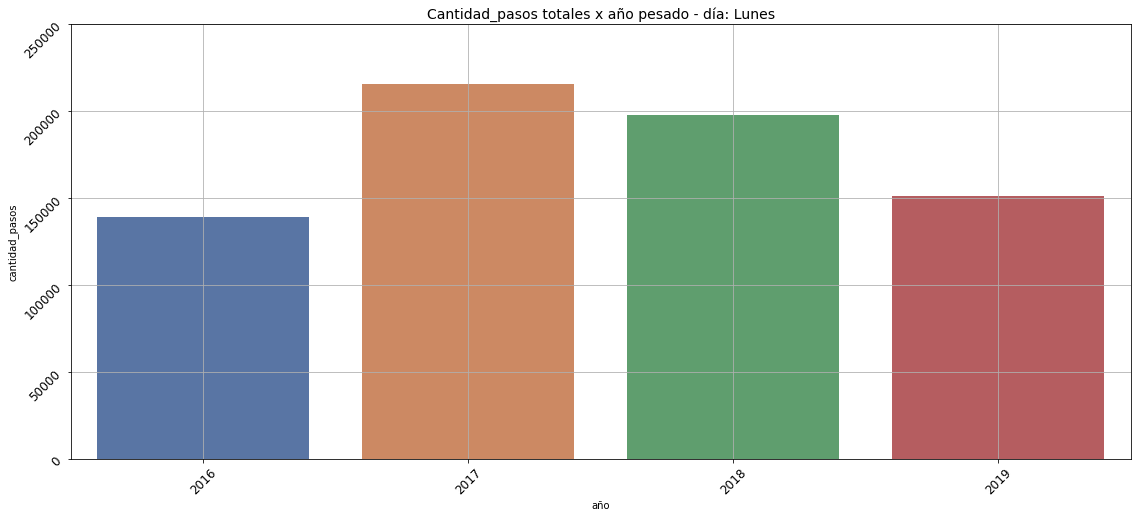

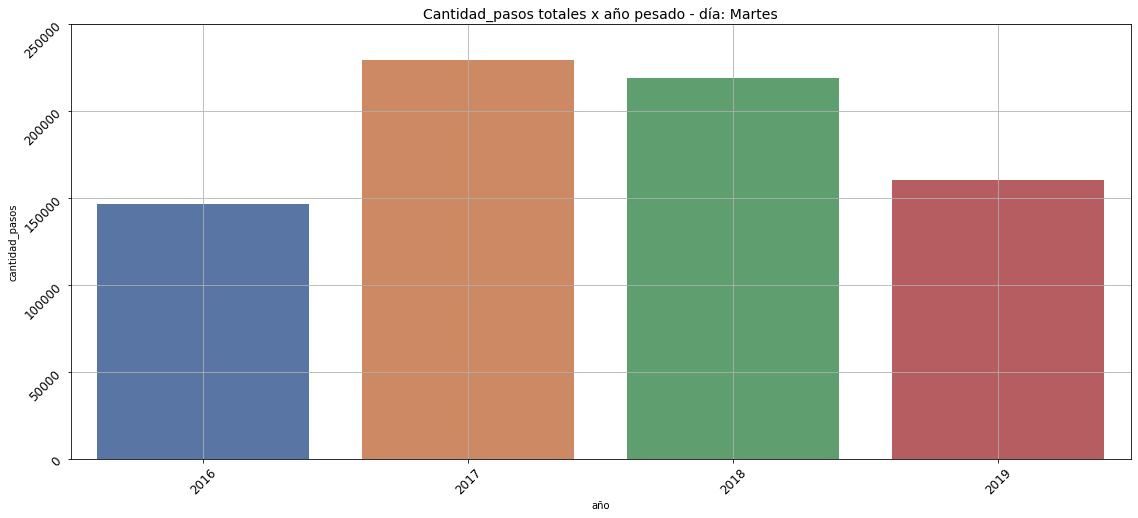

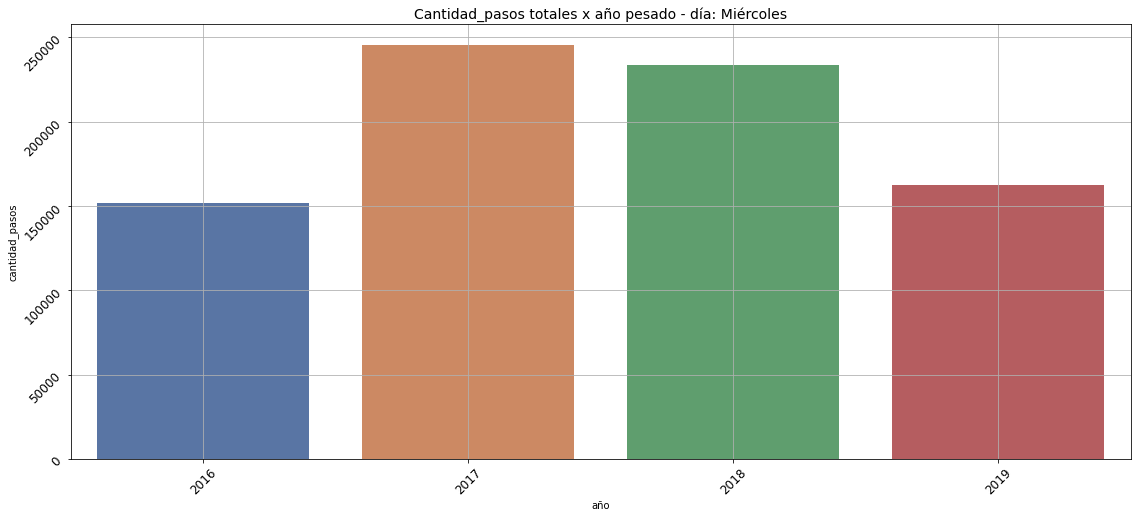

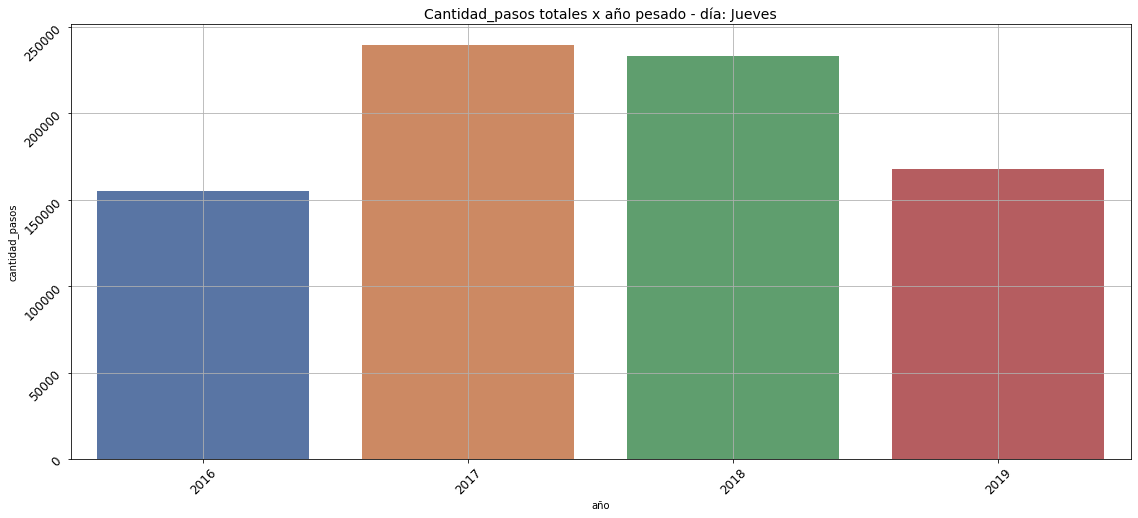

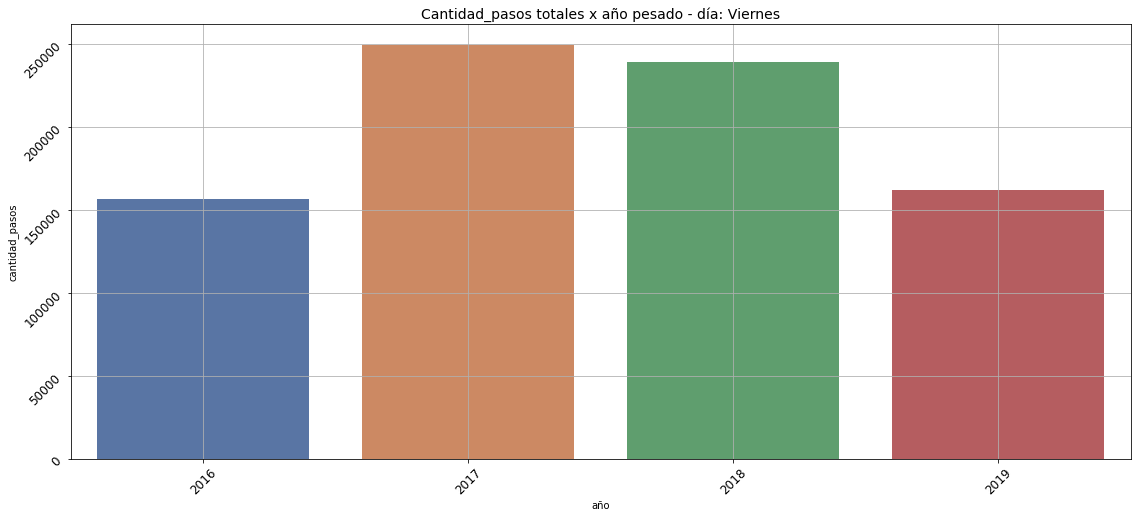

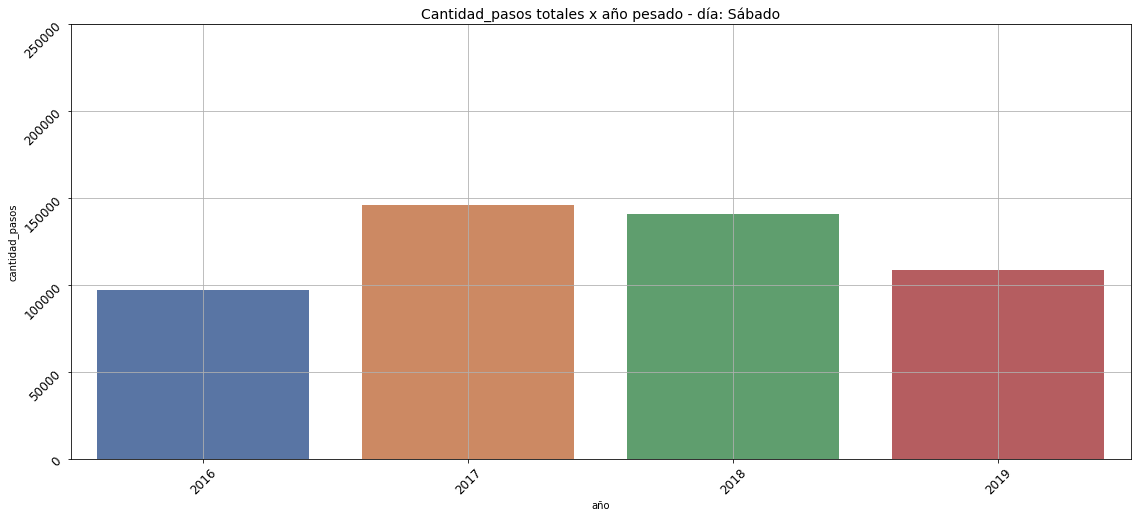

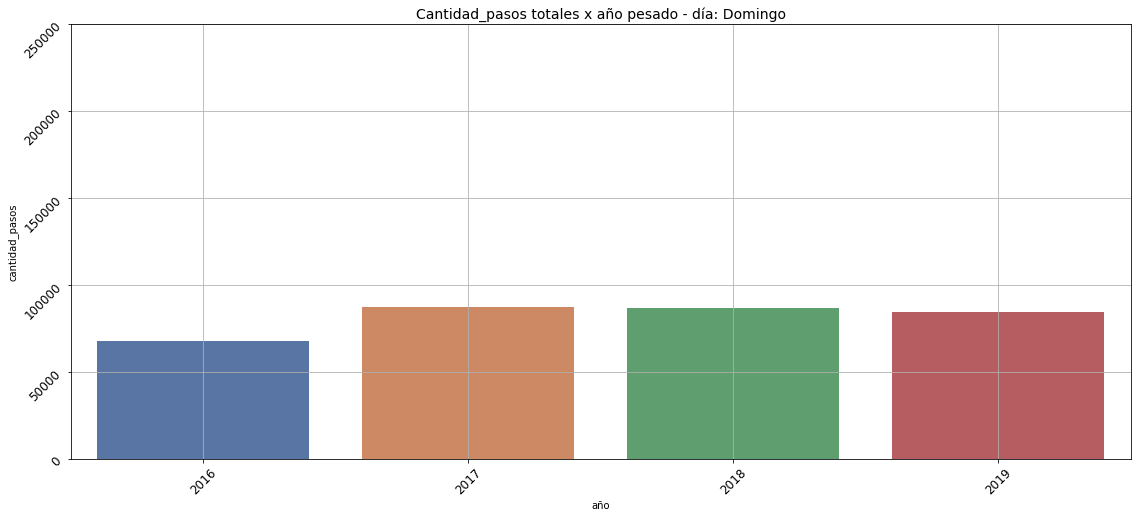

In [48]:
for dia in order_days:
    plt.figure(figsize = (19,8))
    sns.barplot(data = pesado_dia[pesado_dia['dia']== dia], x='año', y ='cantidad_pasos', palette="deep")
    plt.title('Cantidad_pasos totales x año pesado - día: '+dia, fontsize = 14)
    #plt.ylabel('Cantidad de pasos x Millón', fontsize = 14)
    plt.xticks(rotation = 45,fontsize = 12)
    plt.yticks(range(0, 300000,50000),
               [str(i) for i in range(0, 300000,50000)],
               rotation = 45,
               fontsize = 12)
    plt.grid()

Se observa nuevamente el decrecimiento en el tráfico pesado con el paso de los años, esto sucede para todos los días de la semana, a excepción del día domingo que parece mas estable.

In [49]:
order_years = [2016,2017,2018,2019]

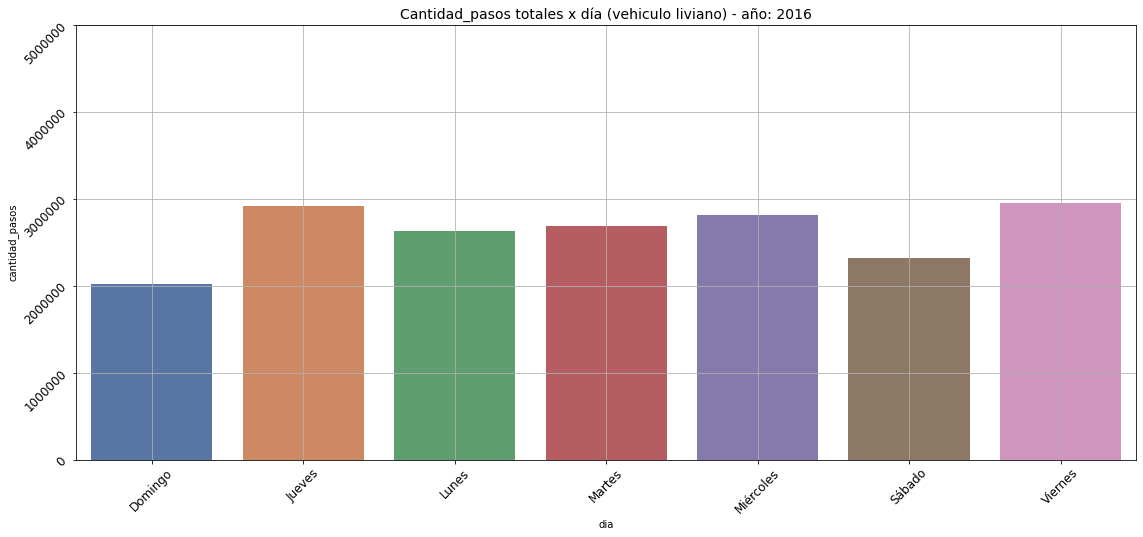

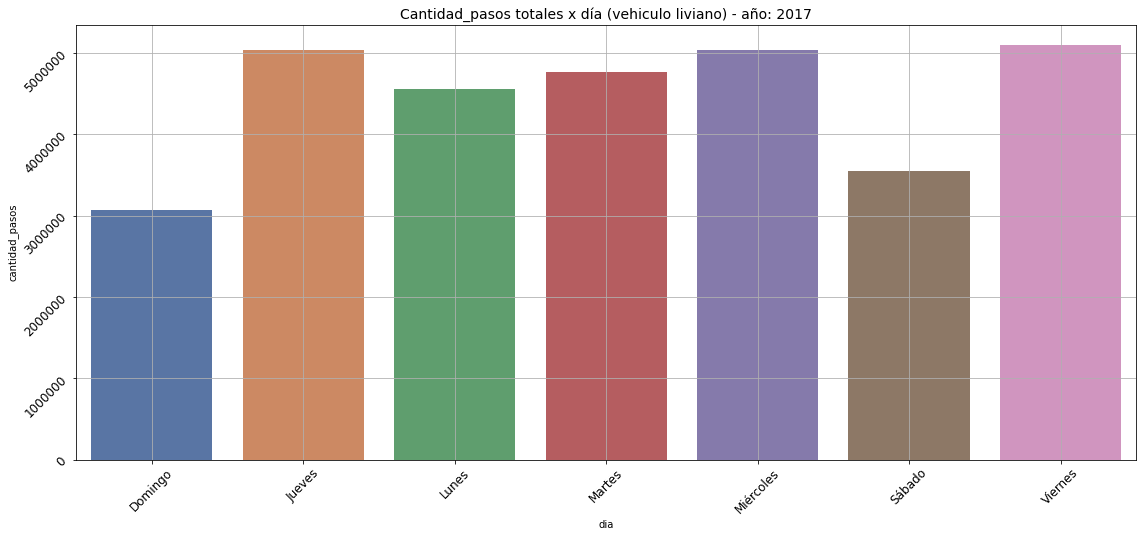

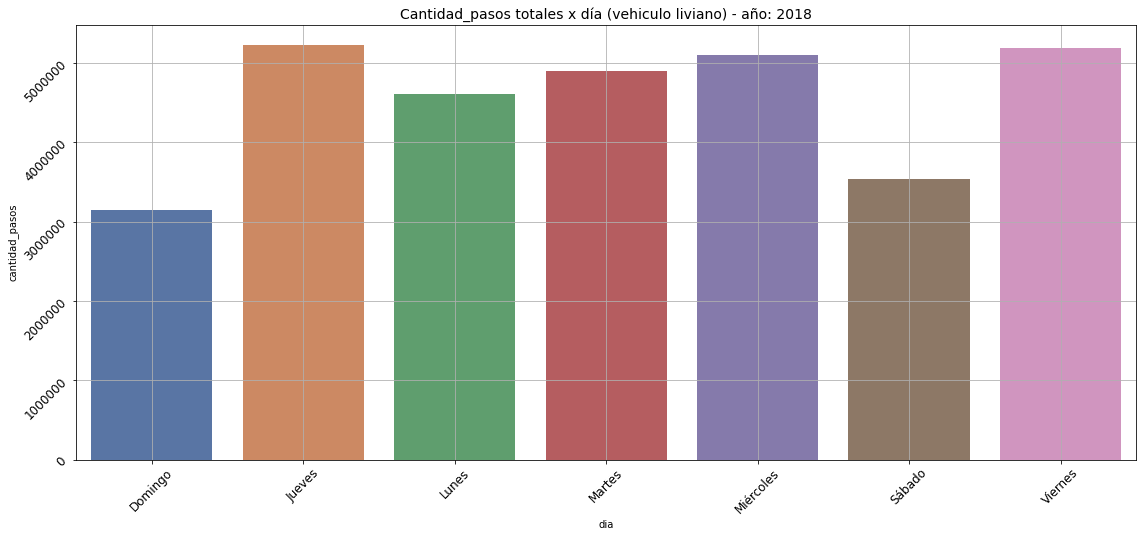

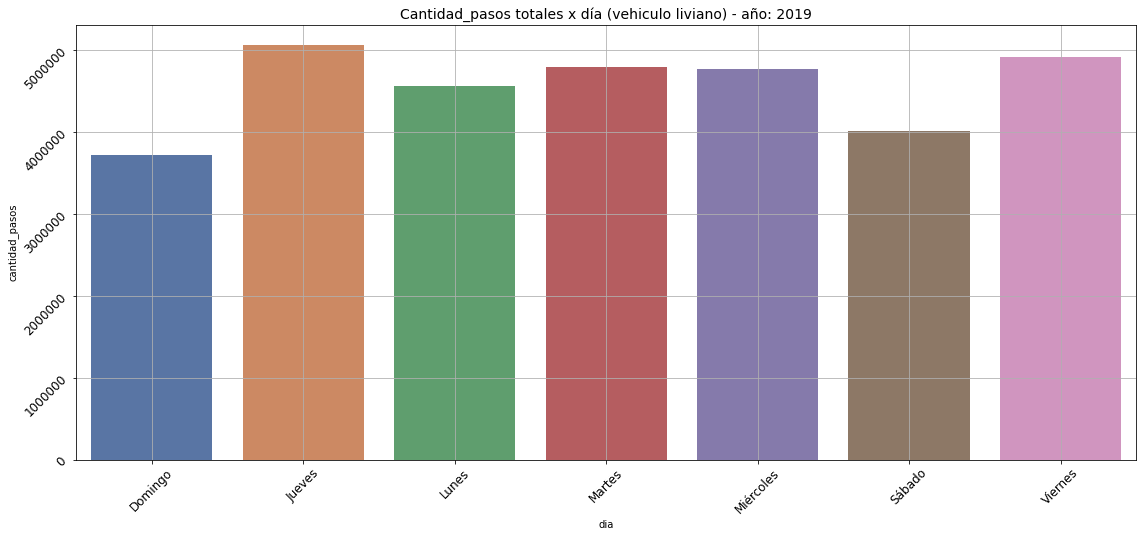

In [50]:
for year in order_years:
    plt.figure(figsize = (19,8))
    sns.barplot(data = liviano_dia[liviano_dia['año']== year], x='dia', y ='cantidad_pasos', palette="deep")
    plt.title('Cantidad_pasos totales x día (vehiculo liviano) - año: ' +str(year), fontsize = 14)
    #plt.ylabel('Cantidad de pasos x Millón', fontsize = 14)
    plt.xticks(rotation = 45,fontsize = 12)
    plt.yticks(range(0, 5222254,1000000),
               [str(i) for i in range(0, 5222254,1000000)],
               rotation = 45,
               fontsize = 12)
    plt.grid()

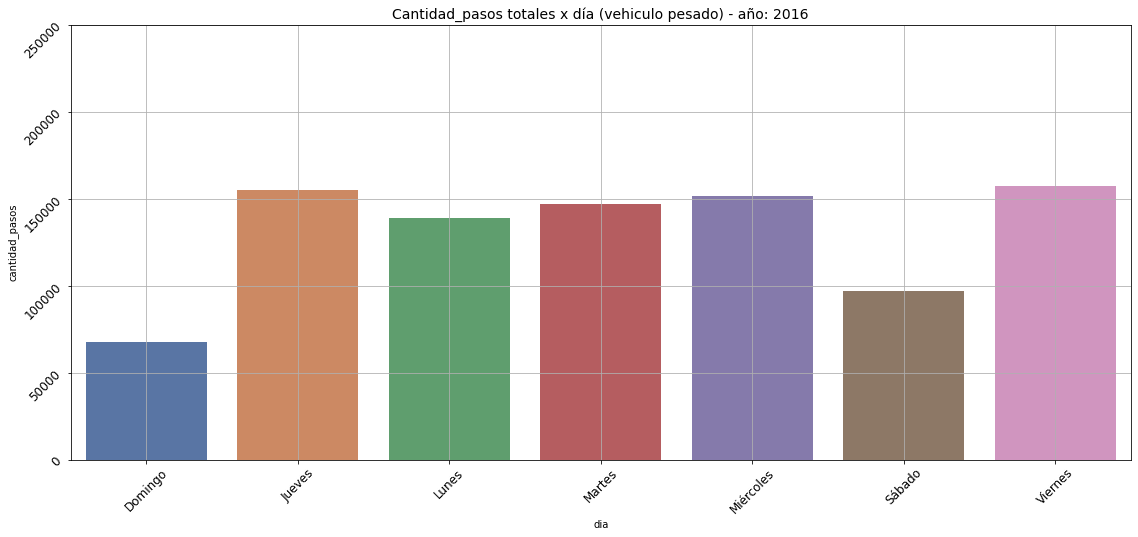

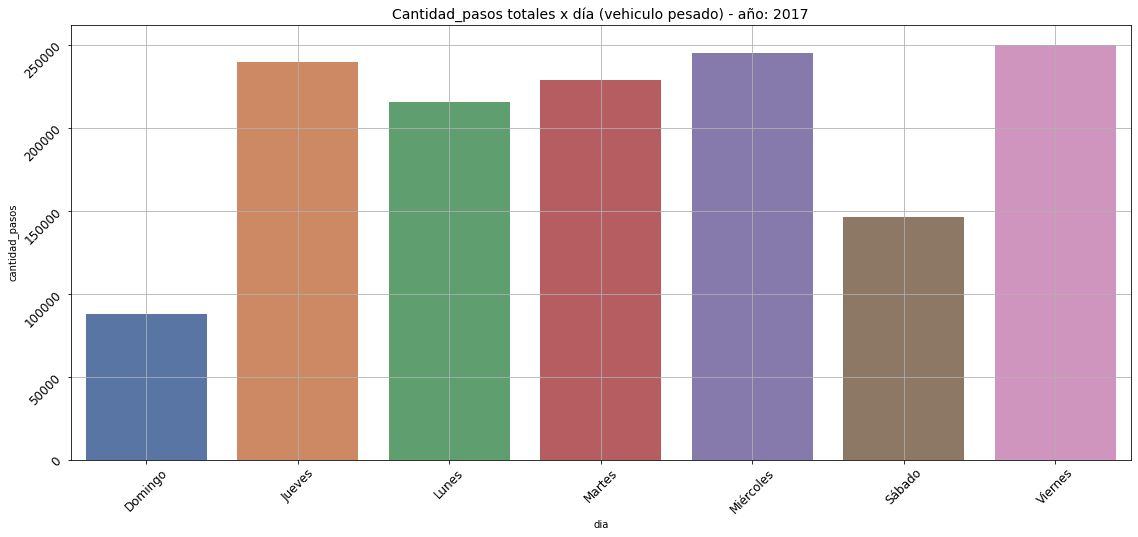

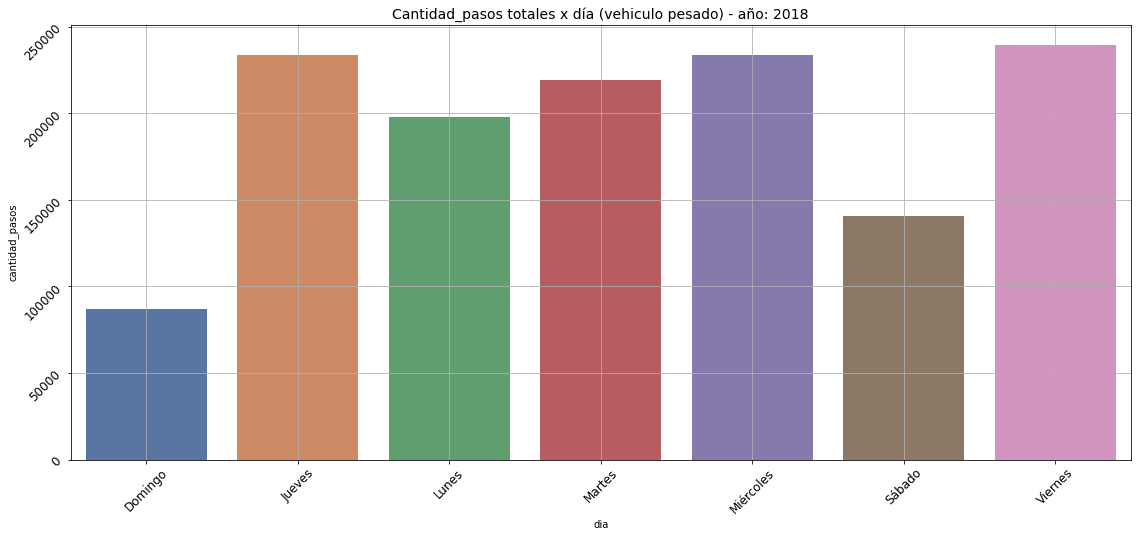

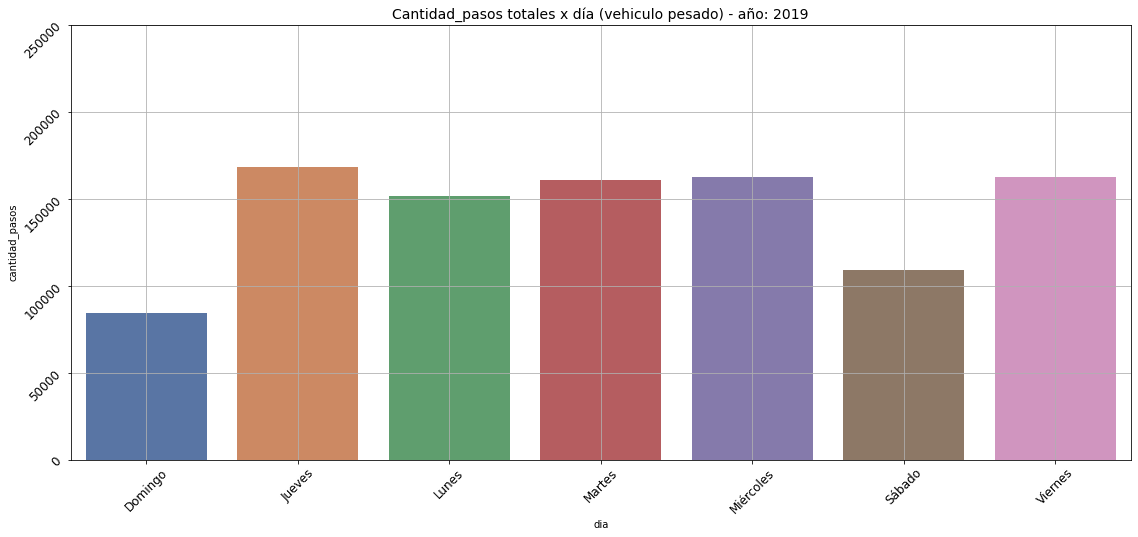

In [51]:
for year in order_years:
    plt.figure(figsize = (19,8))
    sns.barplot(data = pesado_dia[liviano_dia['año']== year], x='dia', y ='cantidad_pasos', palette="deep")
    plt.title('Cantidad_pasos totales x día (vehiculo pesado) - año: ' +str(year), fontsize = 14)
    #plt.ylabel('Cantidad de pasos x Millón', fontsize = 14)
    plt.xticks(rotation = 45,fontsize = 12)
    plt.yticks(range(0, 300000,50000),
               [str(i) for i in range(0, 300000,50000)],
               rotation = 45,
               fontsize = 12)
    plt.grid()

## Recien vimos el comportamiento según la cantidad total de los pasos en los años bajo estudio, ahora observaremos el Comportamiento teniendo en cuenta el promedio de la cantidad de pasos.

In [52]:
# Ahora vemos la cantidad de pasos en promedio x día y su variación anual.
liviano_dia_prom = liviano1.pivot_table(values = 'cantidad_pasos',
                                index = ['dia','año'], 
                                aggfunc = 'mean')
liviano_dia_prom = liviano_dia_prom.reset_index()
liviano_dia_prom.head(2)

dia   año  cantidad_pasos
0  Domingo  2016      404.740153
1  Domingo  2017      397.428386

In [53]:
pesado_dia_prom = pesado1.pivot_table(values = 'cantidad_pasos',
                                index = ['dia','año'], 
                                aggfunc = 'mean')
pesado_dia_prom = pesado_dia_prom.reset_index()
pesado_dia_prom.head(2)

dia   año  cantidad_pasos
0  Domingo  2016        7.356157
1  Domingo  2017        5.626060

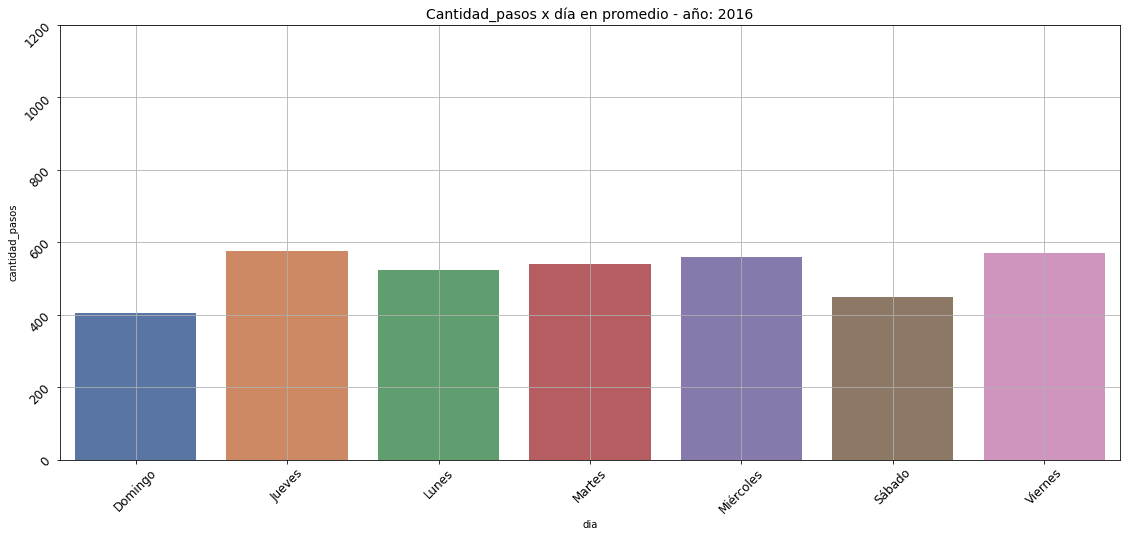

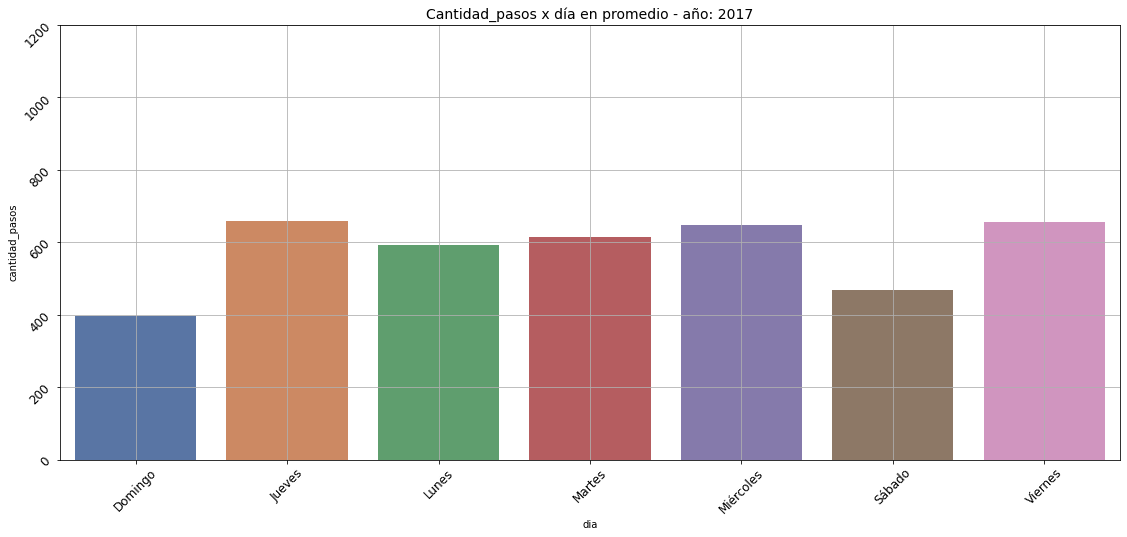

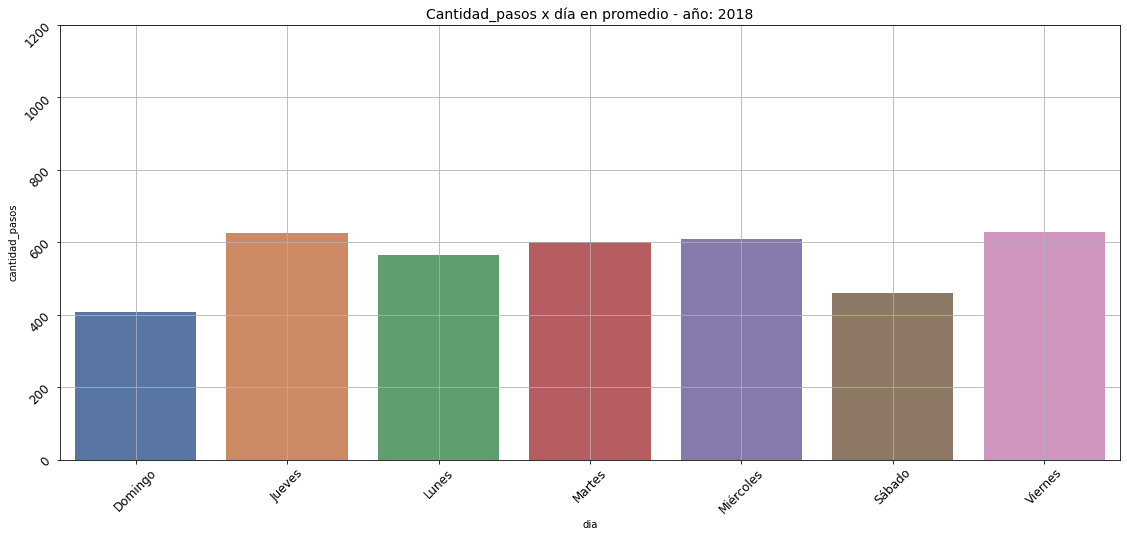

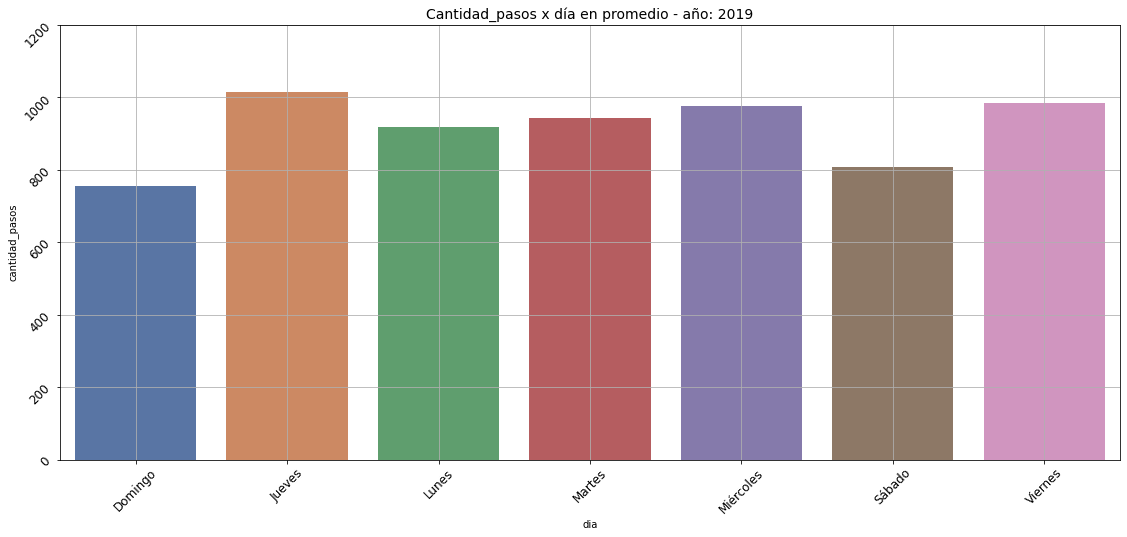

In [54]:
for year in order_years:
    plt.figure(figsize = (19,8))
    sns.barplot(data = liviano_dia_prom[liviano_dia_prom['año']== year], x='dia', y ='cantidad_pasos', palette="deep")
    plt.title('Cantidad_pasos x día en promedio - año: ' +str(year), fontsize = 14)
    #plt.ylabel('Cantidad de pasos x Millón', fontsize = 14)
    plt.xticks(rotation = 45,fontsize = 12)
    plt.yticks(range(0, 1300,200),
               [str(i) for i in range(0, 1300,200)],
               rotation = 45,
               fontsize = 12)
    
    plt.grid()

Podemos observar que la cantidad de pasos en promedios aumento considerablemente en el año 2019, pasando de 600 autos en los días de semana a más de 900 para este último año.

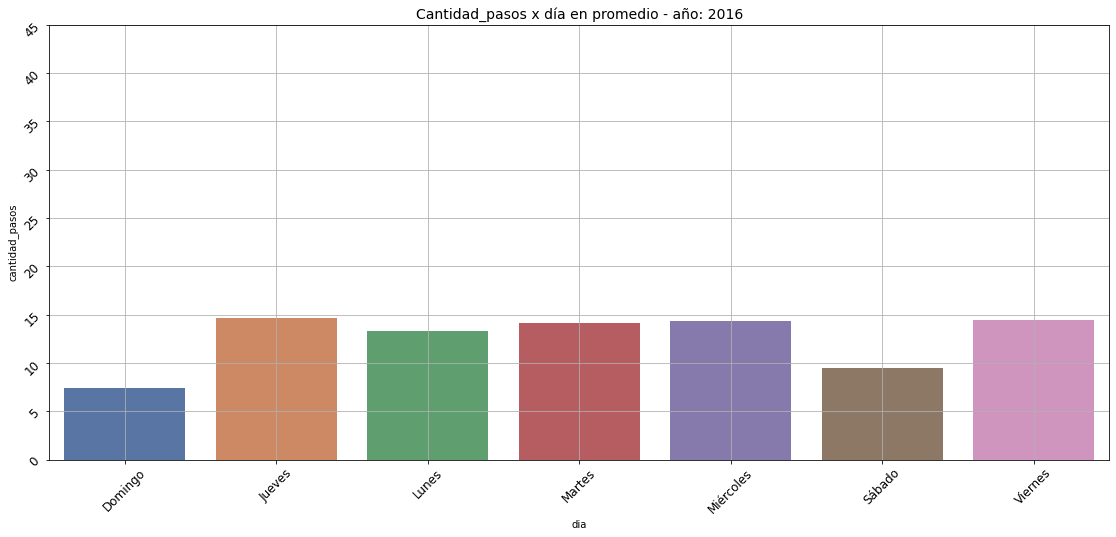

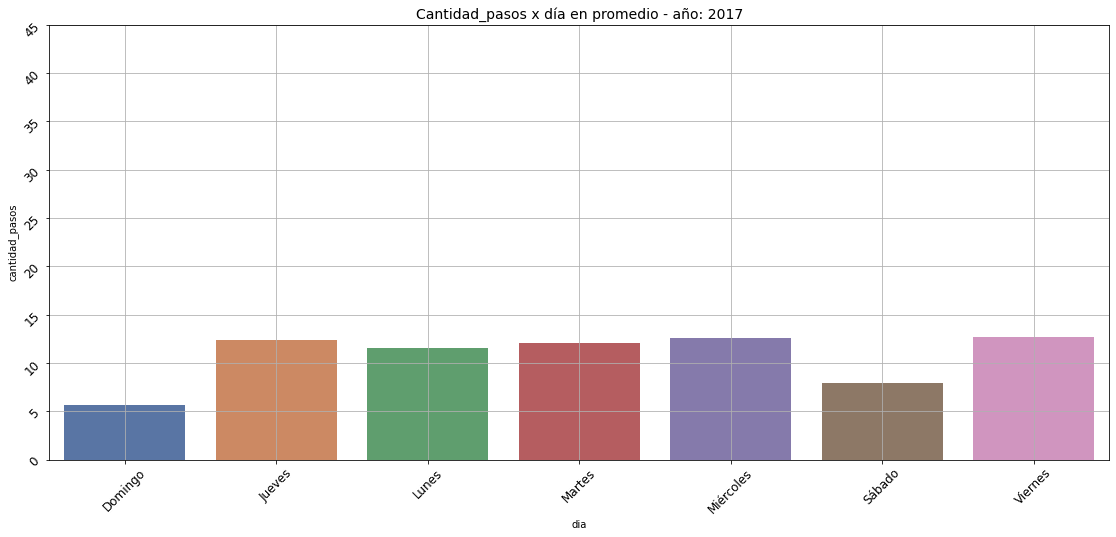

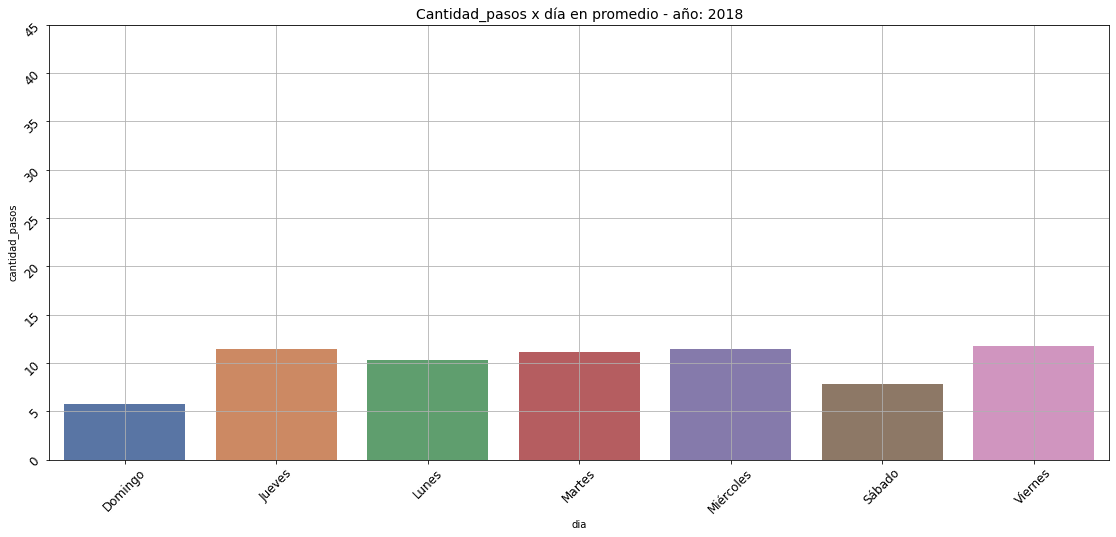

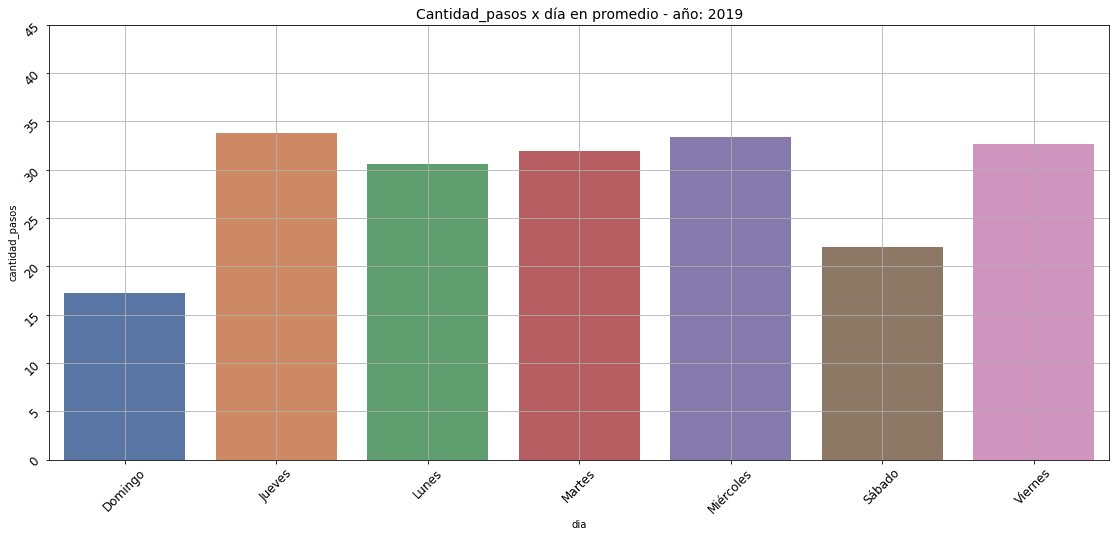

In [55]:
for year in order_years:
    plt.figure(figsize = (19,8))
    sns.barplot(data = pesado_dia_prom[pesado_dia_prom['año']== year], x='dia', y ='cantidad_pasos', palette="deep")
    plt.title('Cantidad_pasos x día en promedio - año: ' +str(year), fontsize = 14)
    #plt.ylabel('Cantidad de pasos x Millón', fontsize = 14)
    plt.xticks(rotation = 45,fontsize = 12)
    plt.yticks(range(0, 50,5),
               [str(i) for i in range(0, 50,5)],
               rotation = 45,
               fontsize = 12)
    
    plt.grid()

En el año 2016 tuvimos un promedio máximo de 15 vehiculos en la semana, en el 2017 un promedio máximo de 13 vehiculos, en el 2018 12 vehiculos, y en el año 2019 un repunte a más de 30 vehiculos por semana.

## Ahora estudiaremos la diferencia en la cantidad de pasos según la hora

In [56]:
liviano1['horas']= liviano1['fecha'].dt.hour
pesado1['horas']= pesado1['fecha'].dt.hour

<ipython-input-56-96b2cdb325b0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  liviano1['horas']= liviano1['fecha'].dt.hour
<ipython-input-56-96b2cdb325b0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pesado1['horas']= pesado1['fecha'].dt.hour


In [57]:
## A continuación veremos un mapa de calor viendo en más detalle, los horarios pico para los autos livianos y para los autos pesados.
liviano_hora_prom = liviano1.pivot_table(values = 'cantidad_pasos',
                                index = ['dia','horas'], 
                                aggfunc = 'mean')
liviano_hora_prom = liviano_hora_prom.reset_index()
liviano_hora_prom.head(2)

dia  horas  cantidad_pasos
0  Domingo      0      340.669847
1  Domingo      1      340.888354

In [58]:
## A continuación veremos un mapa de calor viendo en más detalle, los horarios pico para los autos livianos y para los autos pesados.
pesado_hora_prom = pesado1.pivot_table(values = 'cantidad_pasos',
                                index = ['dia','horas'], 
                                aggfunc = 'mean')
pesado_hora_prom = pesado_hora_prom.reset_index()
pesado_hora_prom.head(2)

dia  horas  cantidad_pasos
0  Domingo      0        5.479737
1  Domingo      1        4.347495

In [59]:
mapa_liviano = liviano_hora_prom.pivot_table(values = 'cantidad_pasos', index = 'dia', columns = 'horas').loc[order_days]
mapa_liviano

horas              0           1           2           3           4   \
dia                                                                     
Lunes      243.996183  225.666667  129.760194   85.930049   71.310277   
Martes     264.607486  172.015296   98.777778   62.352362   54.902750   
Miércoles  284.898386  191.693564  107.884690   67.982283   58.471976   
Jueves     305.325048  229.199810  125.289952   68.965953   56.540646   
Viernes    352.143403  252.058095  151.763636   88.338178   70.995169   
Sábado     343.180688  310.960952  248.455067  168.812081  118.696532   
Domingo    340.669847  340.888354  308.755981  236.186730  156.352262   

horas              5           6           7           8            9   ...  \
dia                                                                     ...   
Lunes       94.015355  203.719848  497.829224  890.871454  1027.038182  ...   
Martes      78.709770  184.561787  506.872594  946.990283  1110.945305  ...   
Miércoles   82.231214  190.956232  515.956004  962.745201  1132.056859  ...   
Jueves      81.998073  193.089269  518.440909  974.727034  1134.450945  ...   
Viernes     93.233654  197.943182  497.164684  918.989474  1084.877849  ...   
Sábado     123.475551  191.703916  296.266289  438.666036   582.960952  ...   
Domingo    130.723240  174.196753  230.960302  291.432459   326.732283  ...   

horas              14          15           16           17           18  \
dia                                                                        
Lunes      870.170799  846.173913   900.644689   939.365984  1067.040687   
Martes     910.990926  914.414768   955.906679   978.081488  1106.086331   
Miércoles  921.330961  934.437218   995.778689  1016.741792  1120.996441   
Jueves     973.287263  966.207665  1021.864743  1044.943413  1166.368231   
Viernes    984.647321  976.964695  1028.533572  1039.383392  1058.715044   
Sábado     801.931839  702.626168   682.464015   698.266098   714.580131   
Domingo    650.021556  536.160482   593.912512   713.077498   792.378026   

horas               19          20          21          22          23  
dia                                                                     
Lunes      1094.858568  864.650092  653.853321  475.613572  351.640148  
Martes     1132.770889  912.981785  715.912684  507.321462  358.758242  
Miércoles  1133.995563  935.972752  746.995387  532.423256  384.297248  
Jueves     1178.117541  976.451584  779.205910  551.262172  402.255814  
Viernes    1045.625559  890.180505  811.575730  658.479925  444.698442  
Sábado      741.969159  754.975023  756.587793  628.901718  417.470752  
Domingo     799.968721  774.914736  694.091837  556.587079  437.965961  

[7 rows x 24 columns]

In [60]:
mapa_pesado = pesado_hora_prom.pivot_table(values = 'cantidad_pasos', index = 'dia', columns = 'horas').loc[order_days]
mapa_pesado

horas            0         1         2         3         4         5   \
dia                                                                     
Lunes      5.554660  4.466594  3.933372  3.878291  4.576111  6.269190   
Martes     5.929181  4.593478  4.086477  4.113730  4.797118  6.578468   
Miércoles  5.875617  5.044808  4.492845  4.599200  5.176275  6.533641   
Jueves     6.311745  5.077936  4.209651  4.352673  4.990561  6.511979   
Viernes    5.997555  5.289070  4.479110  4.398925  4.976558  6.655721   
Sábado     5.206573  5.251168  4.416086  4.156319  4.345989  5.271762   
Domingo    5.479737  4.347495  4.015007  3.788112  3.717115  3.937630   

horas             6          7          8          9   ...         14  \
dia                                                    ...              
Lunes      12.172886  19.944790  22.830692  21.426752  ...  16.492400   
Martes     12.468619  21.533227  25.092164  23.414226  ...  17.287855   
Miércoles  12.654789  21.832542  24.961584  24.127325  ...  17.690184   
Jueves     12.359361  21.227947  25.543867  23.395320  ...  17.626286   
Viernes    12.522156  21.671446  25.439082  23.462348  ...  18.160200   
Sábado      8.101351  13.733700  15.208145  14.555736  ...  12.174061   
Domingo     6.235219   9.877173   9.481779   9.435649  ...   8.520781   

horas             15         16         17         18         19         20  \
dia                                                                           
Lunes      16.162556  16.406000  15.974338  16.080465  15.530405  10.851138   
Martes     17.338748  17.280079  16.632353  17.262768  16.216070  11.599394   
Miércoles  17.719178  17.796958  17.930502  17.725639  16.872500  11.807741   
Jueves     18.128215  18.225721  17.873383  18.226699  17.087029  12.640863   
Viernes    18.316369  18.031109  17.972416  18.186942  16.267793  11.849073   
Sábado     10.770399   9.540659   9.137299   9.728086   9.440608   8.488974   
Domingo     7.579596   7.478641   7.666348   8.690555   9.250000   8.228868   

horas            21        22        23  
dia                                      
Lunes      7.577172  6.430674  6.428571  
Martes     8.136737  6.522748  6.477239  
Miércoles  8.452830  6.865492  6.643667  
Jueves     8.705856  7.202133  6.964795  
Viernes    9.252985  7.555863  6.708550  
Sábado     7.276862  6.218951  5.575996  
Domingo    7.383399  6.445161  6.061546  

[7 rows x 24 columns]

Text(0.5, 1.0, 'heatmap cantidad de autos promedio x hora (vehiculos livianos)')

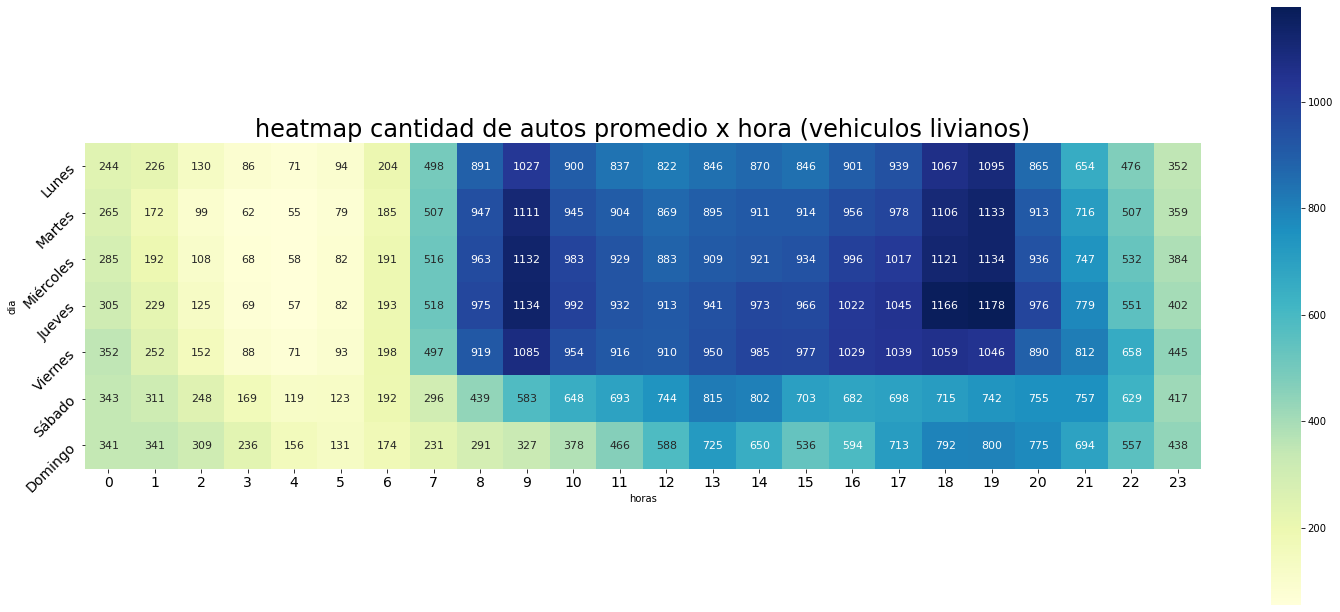

In [61]:
plt.figure(figsize = (25,11))
sns.heatmap(mapa_liviano,
           cbar = True,
           square = True, 
           annot =True,
           fmt = '.0f',
           annot_kws = {'size':11},
           cmap="YlGnBu")
plt.xticks(fontsize = 14)
plt.yticks(rotation = 45, fontsize = 14)
plt.title('heatmap cantidad de autos promedio x hora (vehiculos livianos)', fontsize = 24)

Podemos observar en azul oscuro, los horarios en el que circulan la mayor cantidad de vehiculos livianos por el peaje. Siendo las 9 am y las 19 pm los horarios picos para los días de semana.

Text(0.5, 1.0, 'heatmap cantidad de autos promedio x hora (vehiculos pesados)')

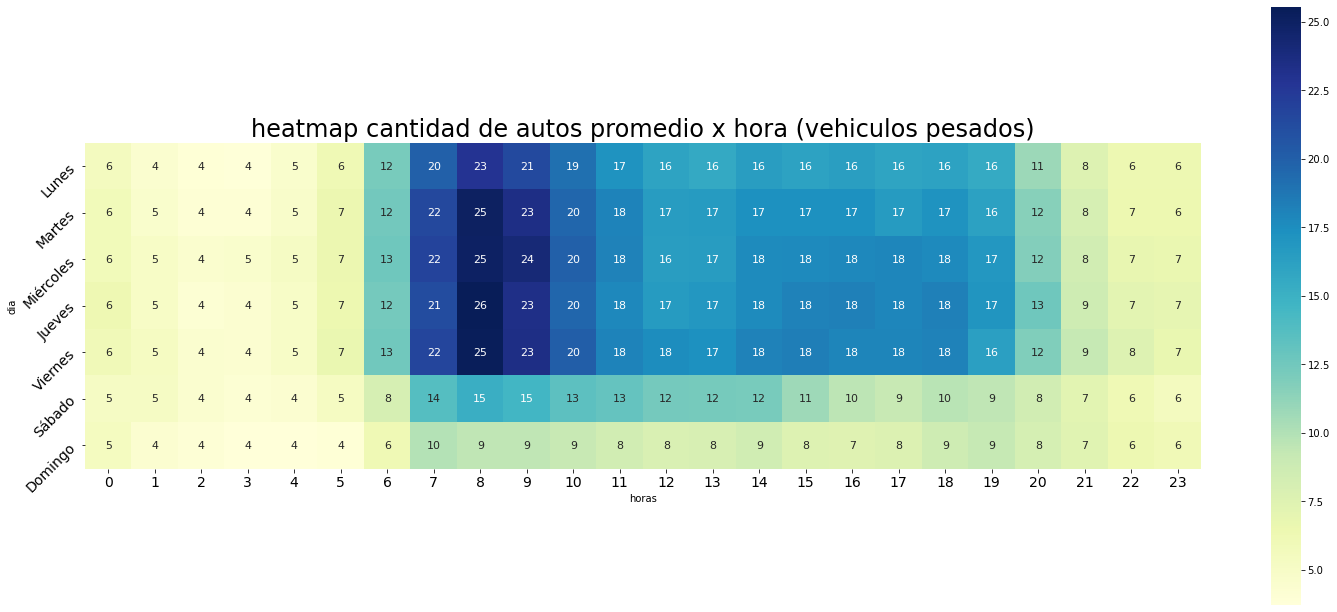

In [62]:
plt.figure(figsize = (25,11))
sns.heatmap(mapa_pesado,
           cbar = True,
           square = True, 
           annot =True,
           fmt = '.0f',
           annot_kws = {'size':11},
           cmap="YlGnBu")
plt.xticks(fontsize = 14)
plt.yticks(rotation = 45, fontsize = 14)
plt.title('heatmap cantidad de autos promedio x hora (vehiculos pesados)', fontsize = 24)

En el caso de los vehiculos pesados, las horas picos las encontramos a las 8 de la mañana en los días laborables.

# Parte B: Modelo de machine Learning

Para nuestra predicción de nuestro modelo agregaremos información de otra fuente, en este caso información sobre las precipitaciones en la provincia, de esta manera observaremo si existe o no influencia sobre el tráfico. También agregaremos información sobre los días festivos.

## Influencia de las precipitaciones en nuestros datos.

In [63]:
#Importamos nuestro dataset
preci = pd.read_csv("/Users/feliorelo/Documents/ACAMICA 2020/Sprint 3/proyecto/historico_precipitaciones.csv")

In [64]:
#Filtramos solo para valores que se encuentren en los años bajo estudio.
preci = preci.iloc[300:348]

In [65]:
preci.head(3)

año      mes     mm  días
300  2016    Enero   34.9     6
301  2016  Febrero  194.0     9
302  2016    Marzo   49.1     7

In [66]:
#Preparamos el dataset para poder trabajarlo.
month = {'Enero':1,'Febrero':2,'Marzo':3,'Abril':4,'Mayo':5,'Junio':6,'Julio':7,'Agosto':8,'Septiembre':9,'Octubre':10,'Noviembre':11,'Diciembre':12}

preci['mes2'] = preci['mes'].apply(lambda x: month[x])

In [67]:
preci.drop(columns=['mes'], inplace = True)
preci.rename(columns = {'mes2':'mes'}, inplace = True)

In [68]:
#Creamos columna datetime para poder trabajar con las precipitaciones y nuestro dataset.
preci['fecha'] = pd.to_datetime(preci['días'].astype(str) + preci['mes'].astype(str) + preci['año'].astype(str), format='%d%m%Y')

In [69]:
preci.head(2)

año     mm  días  mes      fecha
300  2016   34.9     6    1 2016-01-06
301  2016  194.0     9    2 2016-02-09

In [70]:
preci.shape

(48, 5)

In [71]:
#Agregamos columna de 1(unos) para tener un encoding en los días de lluvias
unos = pd.DataFrame(np.ones((48, 1)))
unos.rename(columns={0: "LLuvias"}, inplace = True)
preci['Lluvias'] = 1.0

In [72]:
preci.head(2)

año     mm  días  mes      fecha  Lluvias
300  2016   34.9     6    1 2016-01-06      1.0
301  2016  194.0     9    2 2016-02-09      1.0

In [73]:
preci.drop(columns=['año','mm','días','mes'], inplace = True)

## Influencia de los días festivos en nuestros datos.

In [74]:
#Importamos la libreria.
from datetime import date
from workalendar.america import Argentina
cal = Argentina()
#Cargamos las fechas bajo estudio, en este caso año 2016-2017-2018-2019.
holidays_2016 = pd.DataFrame(data= cal.holidays(2016))
holidays_2017 = pd.DataFrame(data= cal.holidays(2017))
holidays_2018 = pd.DataFrame(data= cal.holidays(2018))
holidays_2019 = pd.DataFrame(data= cal.holidays(2019))
#Combinamos los años en un solo dataframe
holidays = holidays_2016.append(holidays_2017, ignore_index=True)
holidays = holidays.append(holidays_2018, ignore_index=True)
holidays = holidays.append(holidays_2019, ignore_index=True)
#Combertimos la columna fecha en datetime
holidays['fecha'] = pd.to_datetime(holidays[0])
#Renombramos las columnas
holidays.rename(columns={0:"fecha2" ,1: "holiday" }, inplace = True)
#Dropeamos la columna holiday, ya que no nos interesa saber el motivo del feriado.
holidays.drop("holiday", inplace= True, axis =1)
holidays.drop("fecha2", inplace= True, axis =1)

In [75]:
holidays.shape

(72, 1)

In [76]:
#Creamos una columna con 1, con el fin de tener un encoding antes de unir con nuestro dataset de provincia
unos = pd.DataFrame(np.ones((72, 1)))
unos.rename(columns={0: "x0_holidays"}, inplace = True)
holidays = pd.concat([holidays, unos], axis=1)

In [77]:
holidays.head(2)

fecha  x0_holidays
0 2016-01-01          1.0
1 2016-02-08          1.0

## Preparamos nuestra dataset para poder realizar el modelado

In [78]:
#Preparamos nuestra dataset para poder realizar el modelado. 
#Comenzamos dividiendo en 4 dataset según tipo de vehiculo y sentido.

pesado_centro = dataset[np.logical_and(dataset.sentido=='Centro', dataset.tipo_vehiculo=='Pesado') ]
pesado_provincia = dataset[np.logical_and(dataset.sentido=='Provincia', dataset.tipo_vehiculo=='Pesado')]
liviano_centro = dataset[np.logical_and(dataset.sentido=='Centro', dataset.tipo_vehiculo=='Liviano')]
liviano_provincia = dataset[np.logical_and(dataset.sentido=='Provincia', dataset.tipo_vehiculo=='Liviano')] 

In [79]:
#Resampleamos nuestros datasets a díarios oara que nos quede más ordenado.
pc_dia = pesado_centro.resample('D', on = 'fecha').sum()
pc_dia.head(2)

cantidad_pasos     año
fecha                             
2016-01-01             297  129024
2016-01-02             814  193536

In [80]:
pp_dia = pesado_provincia.resample('D', on = 'fecha').sum()
lc_dia = liviano_centro.resample('D', on = 'fecha').sum()
lp_dia = liviano_provincia.resample('D', on = 'fecha').sum()

In [81]:
df_1 = pd.DataFrame(pd.date_range(start='1/1/2016', end='31/12/2019')).rename(columns={0:'Date'})

In [82]:
#Unimos con el calendario completo nuestros dataset para observar si existe algún día faltante.
pc_dia = df_1.merge(pc_dia, left_on="Date",right_on="fecha", how="left")
pp_dia = df_1.merge(pp_dia, left_on="Date",right_on="fecha", how="left")
lc_dia = df_1.merge(lc_dia, left_on="Date",right_on="fecha", how="left")
lp_dia = df_1.merge(lp_dia, left_on="Date",right_on="fecha", how="left")

In [83]:
#Eliminamos columna año.
pc_dia.drop(columns=['año'], inplace = True)
pp_dia.drop(columns=['año'], inplace = True)
lc_dia.drop(columns=['año'], inplace = True)
lp_dia.drop(columns=['año'], inplace = True)

In [84]:
lp_dia.shape

(1461, 2)

In [85]:
#Agregamos columnas de 1(unos), con el fin de crear un encoding diferenciando cada feature
#(pesado, liviano, centro, provincia)

unos_pc = pd.DataFrame(np.ones((1461, 1)))
unos_pc.rename(columns={0: "Pesado_C"}, inplace = True)
pc_dia = pd.concat([pc_dia, unos_pc], axis=1)

unos_pp = pd.DataFrame(np.ones((1461, 1)))
unos_pp.rename(columns={0: "Pesado_P"}, inplace = True)
pp_dia = pd.concat([pp_dia, unos_pp], axis=1)

unos_lc = pd.DataFrame(np.ones((1461, 1)))
unos_lc.rename(columns={0: "Liviano_C"}, inplace = True)
lc_dia = pd.concat([lc_dia, unos_lc], axis=1)

unos_lp = pd.DataFrame(np.ones((1461, 1)))
unos_lp.rename(columns={0: "Liviano_P"}, inplace = True)
lp_dia = pd.concat([lp_dia, unos_lp], axis=1)


In [86]:
#Ahora combinamos todos los sub-dataset para tener uno global.
dataset_1 = pc_dia.append(pp_dia, ignore_index=True)
dataset_1 = dataset_1.append(lc_dia, ignore_index=True)
dataset_1 = dataset_1.append(lp_dia, ignore_index=True)

In [87]:
dataset_1.fillna(0,inplace=True)
dataset_1.sort_values('Date', inplace = True)
dataset_1.reset_index(drop=True, inplace = True)
dataset_1

Date  cantidad_pasos  Pesado_C  Pesado_P  Liviano_C  Liviano_P
0    2016-01-01             297       1.0       0.0        0.0        0.0
1    2016-01-01           12985       0.0       0.0        1.0        0.0
2    2016-01-01           12180       0.0       0.0        0.0        1.0
3    2016-01-01             140       0.0       1.0        0.0        0.0
4    2016-01-02             814       1.0       0.0        0.0        0.0
...         ...             ...       ...       ...        ...        ...
5839 2019-12-30            1168       1.0       0.0        0.0        0.0
5840 2019-12-31             411       0.0       1.0        0.0        0.0
5841 2019-12-31             466       1.0       0.0        0.0        0.0
5842 2019-12-31           20436       0.0       0.0        1.0        0.0
5843 2019-12-31           20366       0.0       0.0        0.0        1.0

[5844 rows x 6 columns]

## Unificamos dataset + holidays + Precipitaciones.

In [88]:
holidays.head(2)

fecha  x0_holidays
0 2016-01-01          1.0
1 2016-02-08          1.0

In [89]:
#Unimos dataset + holidays
dataset_1 = dataset_1.merge(holidays, left_on="Date",right_on="fecha", how="left")

In [90]:
#Eliminamos columnas innecesarias.
dataset_1.drop("fecha", inplace= True, axis =1)
#Reemplazamos los nulos (dias laborables) por 0, de esta manera dejamos listo el encoding
dataset_1['x0_holidays'] = dataset_1['x0_holidays'].fillna(0)

In [91]:
preci.head(2)

fecha  Lluvias
300 2016-01-06      1.0
301 2016-02-09      1.0

In [92]:
#Unimos dataset + precipitaciones
dataset_1 = dataset_1.merge(preci, left_on="Date",right_on="fecha", how="left")

In [93]:
#Eliminamos columnas innecesarias.
dataset_1.drop("fecha", inplace= True, axis =1)
#Reemplazamos los nulos (dias laborables) por 0, de esta manera dejamos listo el encoding
dataset_1['Lluvias'] = dataset_1['Lluvias'].fillna(0)

In [94]:
dataset_1

Date  cantidad_pasos  Pesado_C  Pesado_P  Liviano_C  Liviano_P  \
0    2016-01-01             297       1.0       0.0        0.0        0.0   
1    2016-01-01           12985       0.0       0.0        1.0        0.0   
2    2016-01-01           12180       0.0       0.0        0.0        1.0   
3    2016-01-01             140       0.0       1.0        0.0        0.0   
4    2016-01-02             814       1.0       0.0        0.0        0.0   
...         ...             ...       ...       ...        ...        ...   
5839 2019-12-30            1168       1.0       0.0        0.0        0.0   
5840 2019-12-31             411       0.0       1.0        0.0        0.0   
5841 2019-12-31             466       1.0       0.0        0.0        0.0   
5842 2019-12-31           20436       0.0       0.0        1.0        0.0   
5843 2019-12-31           20366       0.0       0.0        0.0        1.0   

      x0_holidays  Lluvias  
0             1.0      0.0  
1             1.0      0.0  
2             1.0      0.0  
3             1.0      0.0  
4             0.0      0.0  
...           ...      ...  
5839          0.0      0.0  
5840          0.0      0.0  
5841          0.0      0.0  
5842          0.0      0.0  
5843          0.0      0.0  

[5844 rows x 8 columns]

In [95]:
#Agregamos columnas con los años, meses, día de la semana y dias, para lograr un encoding.
dataset_1['Year'] = dataset_1['Date'].dt.year
dataset_1['Month'] = dataset_1['Date'].dt.month
dataset_1['Day'] = dataset_1['Date'].dt.day
dataset_1['Day_of_week'] = dataset_1['Date'].dt.dayofweek

In [96]:
dataset_1

Date  cantidad_pasos  Pesado_C  Pesado_P  Liviano_C  Liviano_P  \
0    2016-01-01             297       1.0       0.0        0.0        0.0   
1    2016-01-01           12985       0.0       0.0        1.0        0.0   
2    2016-01-01           12180       0.0       0.0        0.0        1.0   
3    2016-01-01             140       0.0       1.0        0.0        0.0   
4    2016-01-02             814       1.0       0.0        0.0        0.0   
...         ...             ...       ...       ...        ...        ...   
5839 2019-12-30            1168       1.0       0.0        0.0        0.0   
5840 2019-12-31             411       0.0       1.0        0.0        0.0   
5841 2019-12-31             466       1.0       0.0        0.0        0.0   
5842 2019-12-31           20436       0.0       0.0        1.0        0.0   
5843 2019-12-31           20366       0.0       0.0        0.0        1.0   

      x0_holidays  Lluvias  Year  Month  Day  Day_of_week  
0             1.0      0.0  2016      1    1            4  
1             1.0      0.0  2016      1    1            4  
2             1.0      0.0  2016      1    1            4  
3             1.0      0.0  2016      1    1            4  
4             0.0      0.0  2016      1    2            5  
...           ...      ...   ...    ...  ...          ...  
5839          0.0      0.0  2019     12   30            0  
5840          0.0      0.0  2019     12   31            1  
5841          0.0      0.0  2019     12   31            1  
5842          0.0      0.0  2019     12   31            1  
5843          0.0      0.0  2019     12   31            1  

[5844 rows x 12 columns]

### Finalmente obtenemos nuestro dataset completo con nuestro One hot encoding para los distintos features y un label encoding para nuestros días, meses y años.

Paso siguiente dividimos en Train - Test nuestros datos para realizar nuestro modelo.
Los datos de test seran los del ultimo trimestre del 2019, desde el 1 de octubre al 31 de diciembre de 2019.

In [97]:
dataset_1[dataset_1['Date']=='2019-10-01']

Date  cantidad_pasos  Pesado_C  Pesado_P  Liviano_C  Liviano_P  \
5476 2019-10-01            1859       0.0       1.0        0.0        0.0   
5477 2019-10-01           41585       0.0       0.0        0.0        1.0   
5478 2019-10-01            2207       1.0       0.0        0.0        0.0   
5479 2019-10-01           43558       0.0       0.0        1.0        0.0   

      x0_holidays  Lluvias  Year  Month  Day  Day_of_week  
5476          0.0      0.0  2019     10    1            1  
5477          0.0      0.0  2019     10    1            1  
5478          0.0      0.0  2019     10    1            1  
5479          0.0      0.0  2019     10    1            1

In [98]:
#Separo mi dataset en train y test
train = dataset_1.iloc[0:5476]
test = dataset_1.iloc[5476:5844]

In [99]:
target_column = ['cantidad_pasos']
variable_features = ['Pesado_C','Pesado_P','Liviano_C','Liviano_P',
                     'x0_holidays','Lluvias','Year','Month','Day','Day_of_week']


In [100]:
#X e y Train.
X_train = train[variable_features]
y_train = train[target_column]

#X e y Test.
X_test = test[variable_features]
y_test = test[target_column]

In [101]:
X_train.shape

(5476, 10)

In [102]:
y_train.shape

(5476, 1)

In [103]:
## X_train
X_train

Pesado_C  Pesado_P  Liviano_C  Liviano_P  x0_holidays  Lluvias  Year  \
0          1.0       0.0        0.0        0.0          1.0      0.0  2016   
1          0.0       0.0        1.0        0.0          1.0      0.0  2016   
2          0.0       0.0        0.0        1.0          1.0      0.0  2016   
3          0.0       1.0        0.0        0.0          1.0      0.0  2016   
4          1.0       0.0        0.0        0.0          0.0      0.0  2016   
...        ...       ...        ...        ...          ...      ...   ...   
5471       0.0       1.0        0.0        0.0          0.0      0.0  2019   
5472       0.0       0.0        1.0        0.0          0.0      0.0  2019   
5473       0.0       1.0        0.0        0.0          0.0      0.0  2019   
5474       0.0       0.0        0.0        1.0          0.0      0.0  2019   
5475       1.0       0.0        0.0        0.0          0.0      0.0  2019   

      Month  Day  Day_of_week  
0         1    1            4  
1         1    1            4  
2         1    1            4  
3         1    1            4  
4         1    2            5  
...     ...  ...          ...  
5471      9   29            6  
5472      9   30            0  
5473      9   30            0  
5474      9   30            0  
5475      9   30            0  

[5476 rows x 10 columns]

In [104]:
#y_test
y_test

cantidad_pasos
5476            1859
5477           41585
5478            2207
5479           43558
5480           30061
...              ...
5839            1168
5840             411
5841             466
5842           20436
5843           20366

[368 rows x 1 columns]

### Escalamos los datos

In [105]:
from sklearn.preprocessing import StandardScaler
#Primero escalamos nuestros target en train y test
#Hacemos una copia de nuestros dataframes
#y_train
scaled_ytrain = y_train.copy()

col_names = ['cantidad_pasos']
features = scaled_ytrain[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)

In [106]:
scaled_ytrain[col_names] = features

In [107]:
scaled_ytrain.head(2)

cantidad_pasos
0       -0.974126
1       -0.345056

In [108]:
#y_test
scaled_ytest = y_test.copy()

col_names_1 = ['cantidad_pasos']
features_1 = scaled_ytest[col_names_1]
#Escalamos con los valores utilizados en train
features_1 = scaler.transform(features_1.values)

In [109]:
scaled_ytest[col_names] = features_1

In [110]:
scaled_ytest.head(2)

cantidad_pasos
5476       -0.896682
5477        1.072930

In [111]:
# Antes de continuar observamos si existe alguna correlación entre nuestros features.
#primero escalamos el dataset train
scaled_train = train.copy()

col_names = ['cantidad_pasos']
features = scaled_train[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
scaled_train[col_names] = features

#Luego escalamos el dataset test
scaled_test = test.copy()

col_names_1 = ['cantidad_pasos']
features_1 = scaled_test[col_names_1]
#Escalamos con los valores utilizados en train
features_1 = scaler.transform(features_1.values)
scaled_test[col_names] = features_1

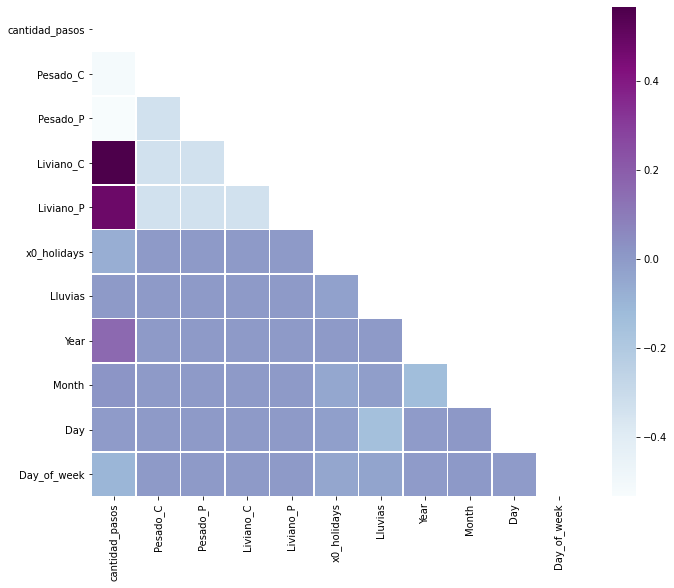

In [112]:
# Compute the correlation matrix 
# exclude 'Open' variable
corr_all = scaled_train.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr_all, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize = (11, 9))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_all, mask = mask,
            square = True, linewidths = .5, ax = ax, cmap = "BuPu")      
plt.show()

Observamos que existe una correlación positiva entre la cantidad de pasos y vehiculos Livianos sentido Centro, y entre cantidad de pasos y los vehiculos livianos sentido provincia.

In [113]:
train.head(2)

Date  cantidad_pasos  Pesado_C  Pesado_P  Liviano_C  Liviano_P  \
0 2016-01-01             297       1.0       0.0        0.0        0.0   
1 2016-01-01           12985       0.0       0.0        1.0        0.0   

   x0_holidays  Lluvias  Year  Month  Day  Day_of_week  
0          1.0      0.0  2016      1    1            4  
1          1.0      0.0  2016      1    1            4

In [114]:
train.set_index(['Date'], inplace = True)

In [115]:
test.set_index(['Date'], inplace = True)

<ipython-input-116-916fc714a27e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['cantidad_pasos'] = train['cantidad_pasos'] * 1.0


Text(0.5, 1.0, 'Estacionalidad Liviano Sentido Provincia')

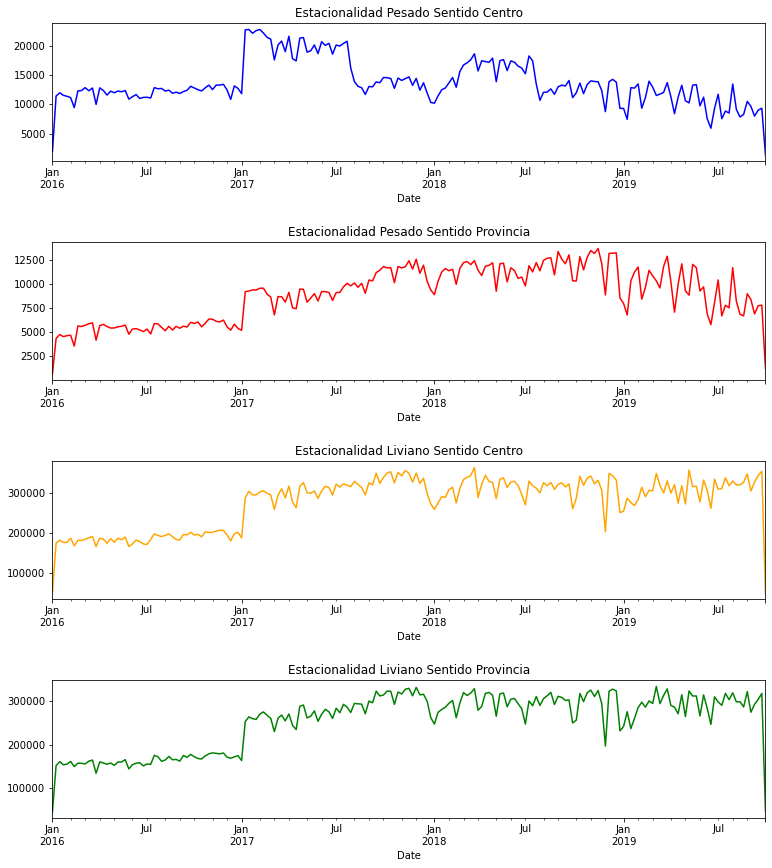

In [116]:
# Observamos el comportamiento de la tendencia y la estacionalidad de cada uno de los vehiculos.
# preparation: input should be float type
train['cantidad_pasos'] = train['cantidad_pasos'] * 1.0

# store types
pasos_a = train[train.Pesado_C == 1.0]['cantidad_pasos']
pasos_b = train[train.Pesado_P == 1.0]['cantidad_pasos']
pasos_c = train[train.Liviano_C == 1.0]['cantidad_pasos']
pasos_d = train[train.Liviano_P == 1.0]['cantidad_pasos']

f, (ax1, ax2, ax3, ax4) = plt.subplots(4, figsize = (12, 13))
f.tight_layout(pad=6.0)
# store types
pasos_a.resample('W').sum().plot(color = 'blue', ax = ax1, label = 'Pesado sentido Centro')
ax1.set_title('Estacionalidad Pesado Sentido Centro')
pasos_b.resample('W').sum().plot(color = 'red', ax = ax2, label = 'Pesado sentido Provincia')
ax2.set_title('Estacionalidad Pesado Sentido Provincia')
pasos_c.resample('W').sum().plot(color = 'orange', ax = ax3, label = 'Liviano sentido Centro')
ax3.set_title('Estacionalidad Liviano Sentido Centro')
pasos_d.resample('W').sum().plot(color = 'green', ax = ax4, label = 'Liviano sentido Provincia')
ax4.set_title('Estacionalidad Liviano Sentido Provincia')

No se observa una estacionalidad muy marcada para los Vehiculos pesados, si se puede observar que para el primer año existe un crecimiento grande en enero de pasos para ambos vehiculos, esto puede deberse a la implementación del Telepase. En el caso de los vehiculos livianos se observa una caida del paso de vehiculos en el mes de diciembre. 

<ipython-input-117-13b6e5cc7e5e>:5: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  decomposition_a = seasonal_decompose(pasos_a, model = 'additive', freq = 365)
<ipython-input-117-13b6e5cc7e5e>:9: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  decomposition_b = seasonal_decompose(pasos_b, model = 'additive', freq = 365)
<ipython-input-117-13b6e5cc7e5e>:13: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  decomposition_c = seasonal_decompose(pasos_c, model = 'additive', freq = 365)
<ipython-input-117-13b6e5cc7e5e>:17: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  decomposition_d = seasonal_decompose(pasos_d, model = 'additive', freq = 182)


Text(0.5, 1.0, 'Tendencia Liviano Sentido Provincia')

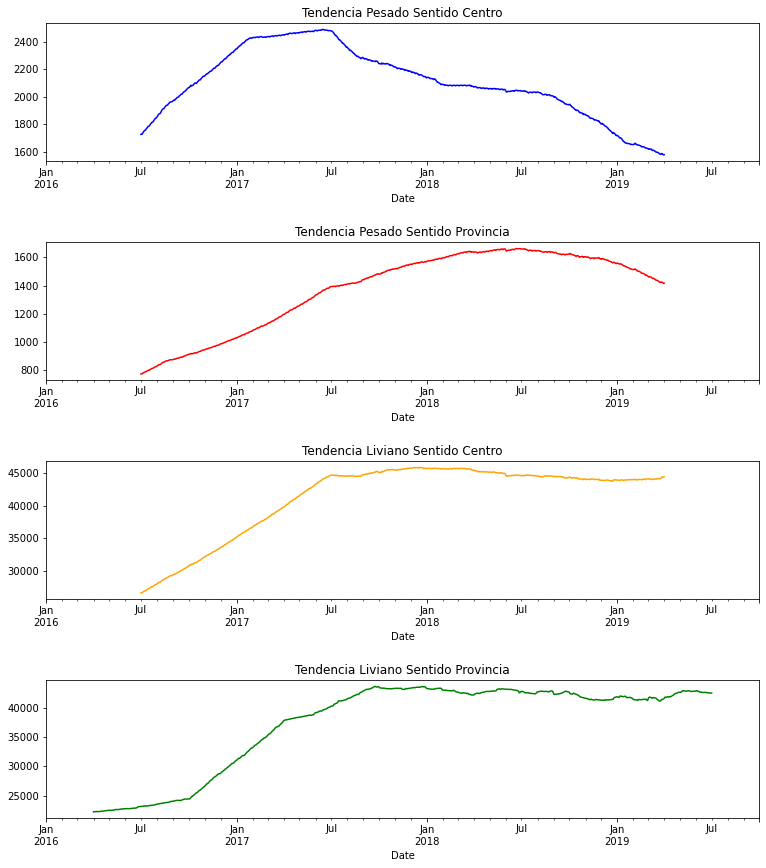

In [117]:
from statsmodels.tsa.seasonal import seasonal_decompose
f, (ax1, ax2, ax3, ax4) = plt.subplots(4, figsize = (12, 13))
f.tight_layout(pad=6.0)
# monthly
decomposition_a = seasonal_decompose(pasos_a, model = 'additive', freq = 365)
decomposition_a.trend.plot(color = 'blue', ax = ax1)
ax1.set_title('Tendencia Pesado Sentido Centro')

decomposition_b = seasonal_decompose(pasos_b, model = 'additive', freq = 365)
decomposition_b.trend.plot(color = 'red', ax = ax2)
ax2.set_title('Tendencia Pesado Sentido Provincia')

decomposition_c = seasonal_decompose(pasos_c, model = 'additive', freq = 365)
decomposition_c.trend.plot(color = 'orange', ax = ax3)
ax3.set_title('Tendencia Liviano Sentido Centro')

decomposition_d = seasonal_decompose(pasos_d, model = 'additive', freq = 182)
decomposition_d.trend.plot(color = 'green', ax = ax4)
ax4.set_title('Tendencia Liviano Sentido Provincia')

Podemos observar lo siguiente:

- Vehiculos Livianos : Existe una tendencia positiva en el primer año hasta Julio del 2017, luego se mantiene constante por el resto de los años.

- Vehiculos Pesados : 
        -En el caso de sentido Centro Existe una tendencia positiva hasta Julio del 2017, luego cambia la pendiente y se mantiene decreciendo hasta el día de hoy.
        -En el caso de sentido provincia, es positiva hasta Julio de 2018 y luego decrece pero en menor medida que en sentido centro.

## MODELO DE BENCHAMARK.

Utilizamos nuestros datasets obtenidos anteriormente partiendo de train y test. Estos son:
 
 -scaled_ytest
 
 -scaled_ytrain
 
 -X_train
 
 -X_Test

** Parámetros de ajuste **

- eta: tamaño de paso utilizado para actualizar los pesos. Un valor más bajo significa un entrenamiento más lento pero una mejor convergencia.
- num_round: número total de iteraciones.
- submuestra: la proporción de datos de entrenamiento utilizados en cada iteración; combate sobreajuste. Debe configurarse en el rango del 30% al 80% del conjunto de datos de entrenamiento y compararse con un valor del 100% si no hay muestreo.
- colsample_bytree: la proporción de características utilizadas en cada iteración, por defecto 1.
- max_depth: La profundidad máxima de cada árbol. Si no limitamos la profundidad máxima, el aumento de gradiente eventualmente se sobreajustará.
- early_stopping_rounds: si no hay un aumento en la puntuación de validación para un número determinado de iteraciones, el algoritmo se detendrá antes y también combatirá el sobreajuste.

In [118]:
# evaluation metric: rmspe
# Root Mean Square Percentage Error
# code chunk shared at Kaggle

def rmspe(y, yhat):
    return np.sqrt(np.mean((yhat / y-1) ** 2))

def rmspe_xg(yhat, y):
    y = np.expm1(y.get_label())
    yhat = np.expm1(yhat)
    return "rmspe", rmspe(y, yhat)

In [119]:
from xgboost.sklearn import XGBRegressor
  
# base parameters
params = {
    'booster': 'gbtree', 
    'objective': 'reg:squarederror', # regression task
    'subsample': 0.8, # 80% of data to grow trees and prevent overfitting
    'colsample_bytree': 0.85, # 85% of features used
    'eta': 0.1, 
    'max_depth': 10, 
    'seed': 42} # for reproducible results

skrg = XGBRegressor(**params)

skrg.fit(X_train, scaled_ytrain,eval_set=[(X_train, scaled_ytrain), 
                    (X_test, scaled_ytest)])

[0]	validation_0-rmse:1.01668	validation_1-rmse:1.08329
[1]	validation_0-rmse:0.92734	validation_1-rmse:0.99365
[2]	validation_0-rmse:0.87313	validation_1-rmse:0.94843
[3]	validation_0-rmse:0.79299	validation_1-rmse:0.86628
[4]	validation_0-rmse:0.71792	validation_1-rmse:0.79146
[5]	validation_0-rmse:0.65779	validation_1-rmse:0.73173
[6]	validation_0-rmse:0.59998	validation_1-rmse:0.67502
[7]	validation_0-rmse:0.56360	validation_1-rmse:0.64280
[8]	validation_0-rmse:0.51263	validation_1-rmse:0.59379
[9]	validation_0-rmse:0.46640	validation_1-rmse:0.54669
[10]	validation_0-rmse:0.42492	validation_1-rmse:0.50911
[11]	validation_0-rmse:0.38758	validation_1-rmse:0.47340
[12]	validation_0-rmse:0.35452	validation_1-rmse:0.44420
[13]	validation_0-rmse:0.32502	validation_1-rmse:0.41928
[14]	validation_0-rmse:0.30363	validation_1-rmse:0.39924
[15]	validation_0-rmse:0.28053	validation_1-rmse:0.37997
[16]	validation_0-rmse:0.26266	validation_1-rmse:0.36361
[17]	validation_0-rmse:0.24356	validation

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.85, eta=0.1, gamma=0,
             gpu_id=-1, importance_type='gain', interaction_constraints='',
             learning_rate=0.100000001, max_delta_step=0, max_depth=10,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1,
             objective='reg:squarederror', random_state=42, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, seed=42, subsample=0.8,
             tree_method='exact', validate_parameters=1, verbosity=None)

Esencialmente, queremos el menor valor. La idea es encontrar los hiperparametros que menor overfitting y underfitting tengan

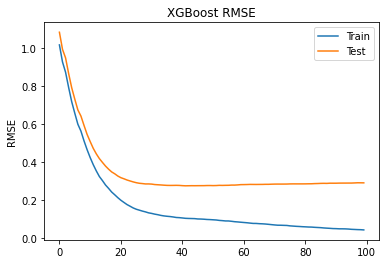

In [120]:
# retrieve performance metrics
results = skrg.evals_result()
epochs = len(results['validation_0']['rmse'])
x_axis = range(0, epochs)
# plot AUC
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['rmse'], label='Train')
ax.plot(x_axis, results['validation_1']['rmse'], label='Test')
ax.legend()
plt.ylabel('RMSE')
plt.title('XGBoost RMSE')
plt.show()

Para mejorar los parámetros a seleccionar, podemos especificar el parámetro de regularización reg_alpha que reduce la complejidad del modelo y mejora el rendimiento, así como el parámetro gamma que representa la reducción de pérdida mínima requerida para hacer un split y también max_depth usado para controlar el sobreajuste(over-fitting).

In [121]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
#Error en test de XGBOOST
print(f'El RMSE es: {np.sqrt(mean_squared_error(scaled_ytest, skrg.predict((X_test))))}')
print(f'El MAE es: {mean_absolute_error(scaled_ytest, skrg.predict((X_test)))}')

El RMSE es: 0.291903768964824
El MAE es: 0.15524651358609368


In [122]:
#Error en train de XGBOOST
print(f'El RMSE es: {np.sqrt(mean_squared_error(scaled_ytrain, skrg.predict((X_train))))}')
print(f'El MAE es: {mean_absolute_error(scaled_ytrain, skrg.predict((X_train)))}')

El RMSE es: 0.04459179937125716
El MAE es: 0.02261030121202913


### Feature Importance.

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

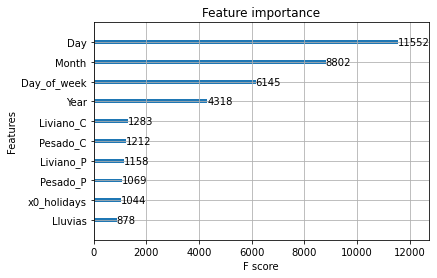

In [123]:
import xgboost as xgb
xgb.plot_importance(skrg)

### Distribución del error

Comenzamos con un reshape, para obtener nuestras predicciónes en una columna y no en una lista.

In [124]:
a = skrg.predict((X_train))

In [125]:
a = a.reshape(5476,1)

In [126]:
b = skrg.predict((X_test))
b = b.reshape(368,1)

/Users/feliorelo/opt/anaconda3/envs/acamicaserie/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/feliorelo/opt/anaconda3/envs/acamicaserie/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'y_pred (test)')

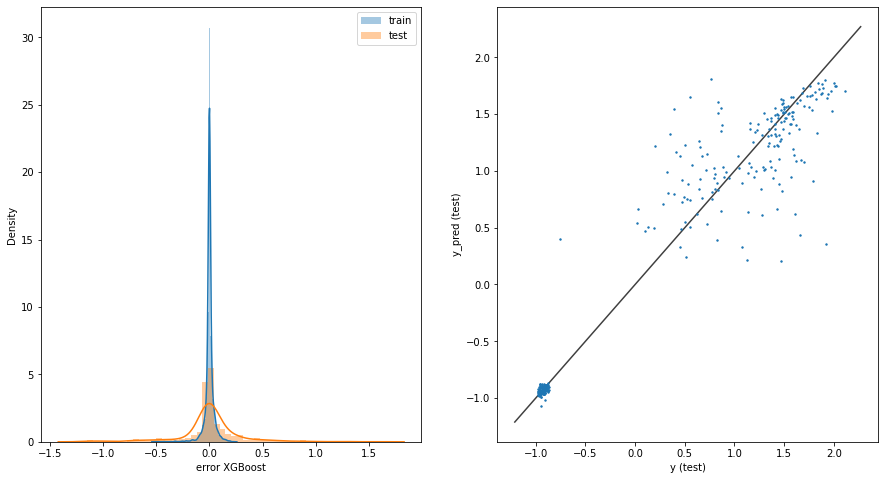

In [127]:
#Distribución del error
plt.figure(figsize = (15,8))
plt.subplot(1,2,1)
sns.distplot(scaled_ytrain - a, label = 'train')
sns.distplot(scaled_ytest - b, label = 'test')
plt.xlabel('error XGBoost')
plt.legend()

ax = plt.subplot(1,2,2)
ax.scatter(scaled_ytest,b, s =2)
lims = [
np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
]
    
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
plt.xlabel('y (test)')
plt.ylabel('y_pred (test)')

En comparación con el proyecto anterior, podemos ver que nuestro modelo mejoro notablemente en cuanto al error agregando datos de vacaciones y de días lluviosos. La mayor densidad del error se encuentra cercano a 0.

### Visualización de la predicción

In [128]:
#Armamos calendario con las fechas a predecir
calendario_prediccion = pd.DataFrame(pd.date_range(start="2019-10-01", end="2019-12-30")).rename(columns={0:'Date'})

In [129]:
#Convertimos en dataframe nuestra prediccion de x_Test
df_prediccion_xgb = pd.DataFrame(b,columns=['cantidad_pasos'])

In [130]:
#Le agregamos la columna con las fechas a testear.
predic_vehiculos = df_prediccion_xgb.assign(Date=calendario_prediccion.Date)
predic_vehiculos['fecha2'] = pd.to_datetime(predic_vehiculos.Date)
predic_vehiculos.set_index('fecha2',inplace=True)

<ipython-input-131-7fd7ef2408c6>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(predic_vehiculos.iloc[::freq].index)


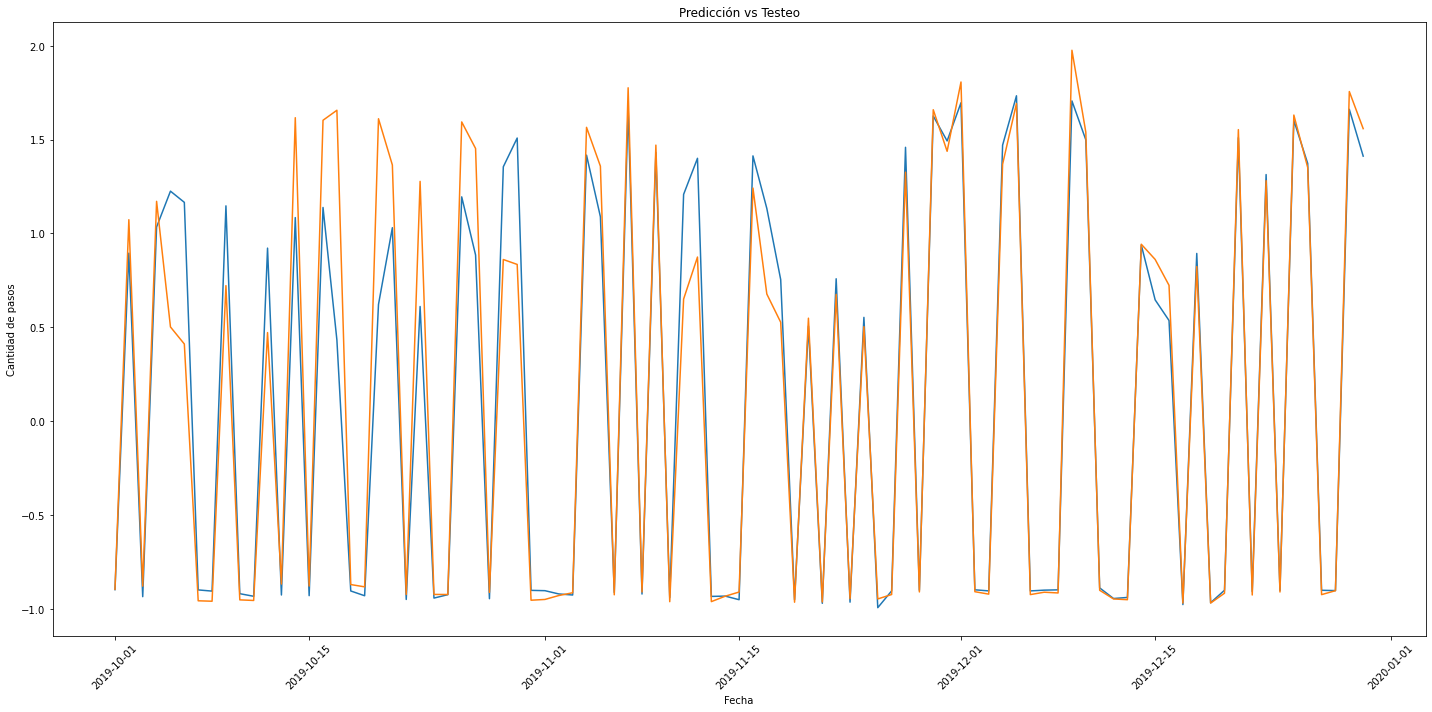

In [131]:
#Gráficamos.
import matplotlib.dates as mdates
fig_dims = (20, 10)
fig, ax = plt.subplots(figsize=fig_dims)
ax = sns.lineplot(x=predic_vehiculos.index, y='cantidad_pasos', data=predic_vehiculos, ax = ax)
ax = sns.lineplot(x=predic_vehiculos.index, y='cantidad_pasos', data=scaled_ytest, ax = ax)

ax.set_facecolor('white')
freq = int(1)
ax.set_xticklabels(predic_vehiculos.iloc[::freq].index)
xtix = ax.get_xticks()
ax.set_xticks(xtix[::freq])

format_ymd = mdates.DateFormatter('%Y-%m-%d')
ax.xaxis.set_major_formatter(format_ymd)
plt.xticks(rotation=45)

plt.xlabel('Fecha')
plt.ylabel('Cantidad de pasos')
plt.title('Predicción vs Testeo')
plt.tight_layout()
plt.show()

Vemos en la gráfica la curva de predicción vs la curva de los datos reales. Como podemos obervar el modelo se comporto de manera correcta, predijo los datos con un error aceptable.

## IMPLEMENTACIÓN DE MODELO NO VISTO EN CLASE, EN ESTE CASO PROPHET.

Utilizamos nuestros datasets obtenidos anteriormente partiendo de train y test. Estos son:
 
 -scaled_ytest
 
 -scaled_ytrain
 
 -X_train
 
 -X_Test

Para trabajar con el modelo de prophet deberiamos hacer un modelo para cada tipo de vehiculo y para cada sentido, es decir 4 modelos, esto se debe a que en nuestro conjunto de datos se encuentran repetidos todos los días 4 veces. 

Para trabajar con nuestro modelo de prophet seleccionaremos solo los vehiculos Livianos sentido provincia.

In [132]:
test

cantidad_pasos  Pesado_C  Pesado_P  Liviano_C  Liviano_P  \
Date                                                                   
2019-10-01            1859       0.0       1.0        0.0        0.0   
2019-10-01           41585       0.0       0.0        0.0        1.0   
2019-10-01            2207       1.0       0.0        0.0        0.0   
2019-10-01           43558       0.0       0.0        1.0        0.0   
2019-10-02           30061       0.0       0.0        1.0        0.0   
...                    ...       ...       ...        ...        ...   
2019-12-30            1168       1.0       0.0        0.0        0.0   
2019-12-31             411       0.0       1.0        0.0        0.0   
2019-12-31             466       1.0       0.0        0.0        0.0   
2019-12-31           20436       0.0       0.0        1.0        0.0   
2019-12-31           20366       0.0       0.0        0.0        1.0   

            x0_holidays  Lluvias  Year  Month  Day  Day_of_week  
Date                                                             
2019-10-01          0.0      0.0  2019     10    1            1  
2019-10-01          0.0      0.0  2019     10    1            1  
2019-10-01          0.0      0.0  2019     10    1            1  
2019-10-01          0.0      0.0  2019     10    1            1  
2019-10-02          0.0      0.0  2019     10    2            2  
...                 ...      ...   ...    ...  ...          ...  
2019-12-30          0.0      0.0  2019     12   30            0  
2019-12-31          0.0      0.0  2019     12   31            1  
2019-12-31          0.0      0.0  2019     12   31            1  
2019-12-31          0.0      0.0  2019     12   31            1  
2019-12-31          0.0      0.0  2019     12   31            1  

[368 rows x 11 columns]

In [133]:
#Ordenamos los datos para train de prophet.
Liviano_P_train = pd.DataFrame(train[train.Liviano_P == 1.0]['cantidad_pasos'])
Liviano_P_train['ds'] = pd.to_datetime(Liviano_P_train.index)
Liviano_P_train.rename(columns = {'cantidad_pasos':'y'}, inplace = True)

In [134]:
Liviano_P_train.head(2)

y         ds
Date                          
2016-01-01  12180.0 2016-01-01
2016-01-02  16840.0 2016-01-02

In [135]:
#Ordenamos los datos test.
Liviano_P_test = pd.DataFrame(test[test.Liviano_P == 1.0]['cantidad_pasos'])
Liviano_P_test['ds'] = pd.to_datetime(Liviano_P_test.index)
Liviano_P_test.rename(columns = {'cantidad_pasos':'y'}, inplace = True)

In [136]:
Liviano_P_test.head(2)

y         ds
Date                        
2019-10-01  41585 2019-10-01
2019-10-02  28227 2019-10-02

In [137]:
import pandas as pd
from fbprophet import Prophet
# Prophet
m_provincia = Prophet(daily_seasonality=True)
m_provincia.fit(Liviano_P_train)

In [138]:
#Como predecimos el ultimo trimestre, establecemos como 90 días el periodo.
future = m_provincia.make_future_dataframe(periods=92)
future.tail()

ds
1456 2019-12-27
1457 2019-12-28
1458 2019-12-29
1459 2019-12-30
1460 2019-12-31

In [139]:
forecast = m_provincia.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds          yhat    yhat_lower    yhat_upper
1456 2019-12-27  42870.095872  35025.854298  51396.966448
1457 2019-12-28  32365.644401  24935.812570  41016.047486
1458 2019-12-29  28088.725300  19740.714173  36374.229343
1459 2019-12-30  38683.808191  30007.295005  46801.203504
1460 2019-12-31  40833.593335  32498.992856  48674.936007

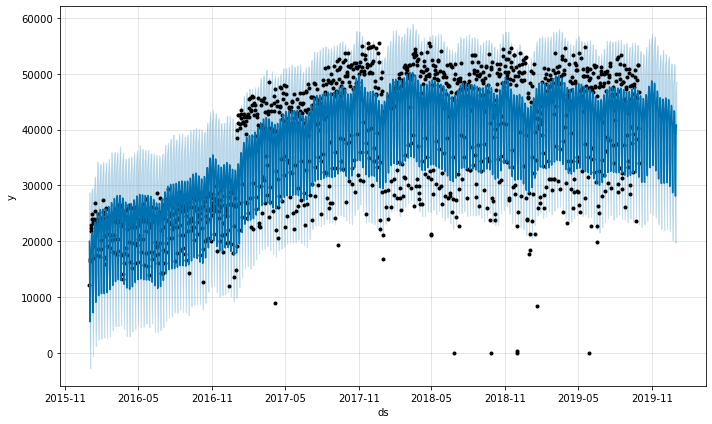

In [140]:
fig1 = m_provincia.plot(forecast)

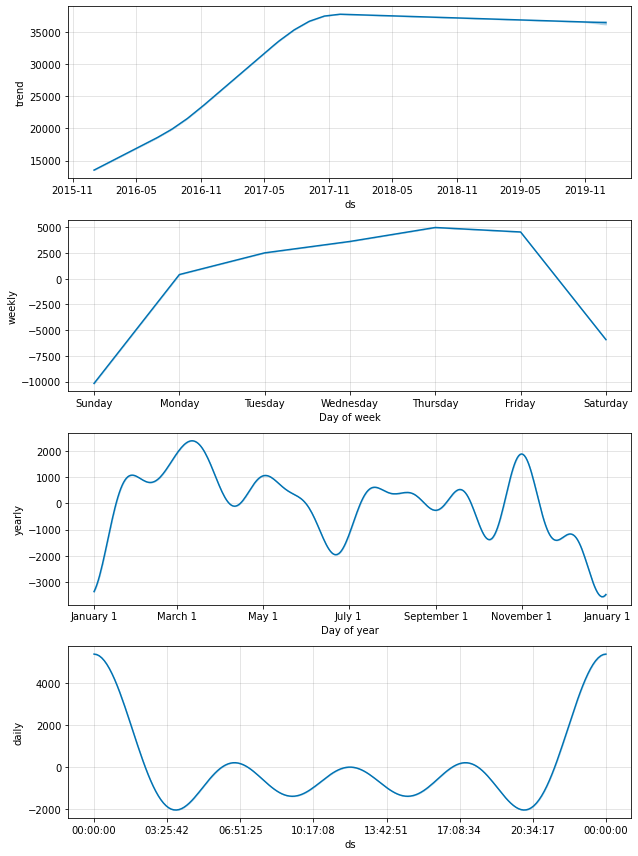

In [141]:
fig2 = m_provincia.plot_components(forecast)

In [142]:
prediccion = forecast[['ds', 'yhat']]
prediccion

ds          yhat
0    2016-01-01  19985.659689
1    2016-01-02   9650.671315
2    2016-01-03   5543.003984
3    2016-01-04  16304.512675
4    2016-01-05  18615.367694
...         ...           ...
1456 2019-12-27  42870.095872
1457 2019-12-28  32365.644401
1458 2019-12-29  28088.725300
1459 2019-12-30  38683.808191
1460 2019-12-31  40833.593335

[1461 rows x 2 columns]

In [143]:
p = Liviano_P_test[['ds','y']]
prediccion = prediccion.merge(p, left_on="ds",right_on="ds", how="left")
prediccion

ds          yhat        y
0    2016-01-01  19985.659689      NaN
1    2016-01-02   9650.671315      NaN
2    2016-01-03   5543.003984      NaN
3    2016-01-04  16304.512675      NaN
4    2016-01-05  18615.367694      NaN
...         ...           ...      ...
1456 2019-12-27  42870.095872  44738.0
1457 2019-12-28  32365.644401  27818.0
1458 2019-12-29  28088.725300  22503.0
1459 2019-12-30  38683.808191  36566.0
1460 2019-12-31  40833.593335  20366.0

[1461 rows x 3 columns]

In [144]:
prediccion.dropna(inplace=True)
prediccion

ds          yhat        y
1369 2019-10-01  43888.183971  41585.0
1370 2019-10-02  44853.763955  28227.0
1371 2019-10-03  46072.337862  29455.0
1372 2019-10-04  45508.904118  52547.0
1373 2019-10-05  34933.527591  53345.0
...         ...           ...      ...
1456 2019-12-27  42870.095872  44738.0
1457 2019-12-28  32365.644401  27818.0
1458 2019-12-29  28088.725300  22503.0
1459 2019-12-30  38683.808191  36566.0
1460 2019-12-31  40833.593335  20366.0

[92 rows x 3 columns]

In [145]:
%matplotlib inline
import logging

logging.getLogger('prophet').setLevel(logging.ERROR)
import warnings
warnings.filterwarnings("ignore")

from fbprophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m_provincia, forecast)

Pra visualizar de manera más interactiva podemos utilizar la libreria Plotly la cuál nos permite observar de manera muy sencilla nuestras predicciones.

In [146]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mean_squared_error(prediccion.y, prediccion.yhat)

66067401.77946973

In [147]:
mean_absolute_error(prediccion.y, prediccion.yhat)

6075.682325221219

### El modelo que obtuvimos de prophet obtuvo un error absoluto de 6075 pasos, el mismo es  grande ya que en este caso estamos tratando de predecir pasos de vehiculos Livianos en un solo sentido.

# Conclusión

Nuestro modelo de benchmark de XGBOOST tuvo un rendimiento considerablemente mayor, esto se debe a que le podemos agregar información extra que ayude al modelo a predecir, como fueron los días festivos, los días de lluvia, entre otros más datos que nos parezcan relevantes. El modelo de prophet se podría usar para obtener información rápida y solo en casos en donde solo tengamos nuestra variable objetivo y fecha y ningun otro dato al alcance de la mano.

# A mejorar.

Me hubiese gustado realizar un modelo de red neuronal para resolver este problema, pero al no contar con documentación que me ayudara a trabajar con datasets de este estilo no pude realizarlo. Creo que es un tema pendeniende a mejorar de Acamica.


En cuanto alas clases, muchisimas gracias a todos los profesionales que nos ayudaron durante el cursado, estoy muy contento con los conocimientos adquiridos.